# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 

!pip install plotnine


Running this project require the following imports 

In [35]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [36]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)


## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



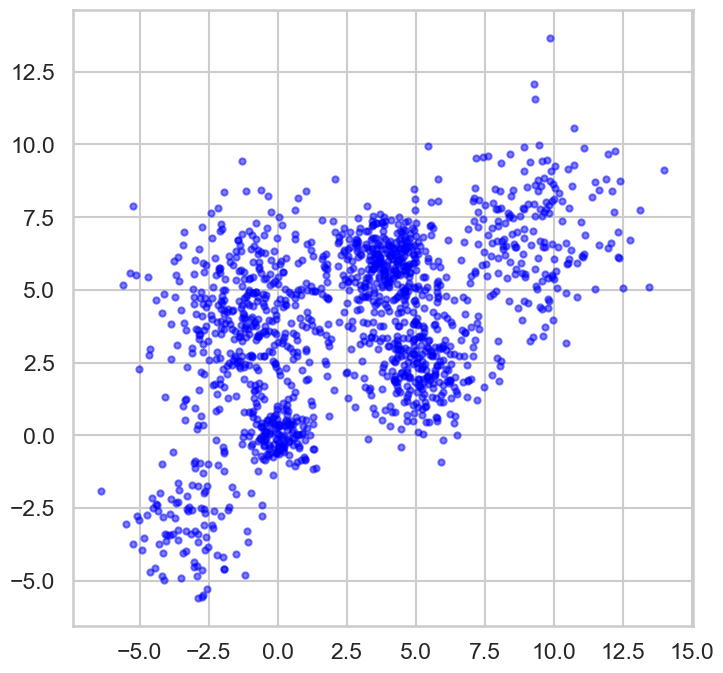

In [37]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

For n_clusters = 2 The average silhouette_score is : 0.4751544541991239


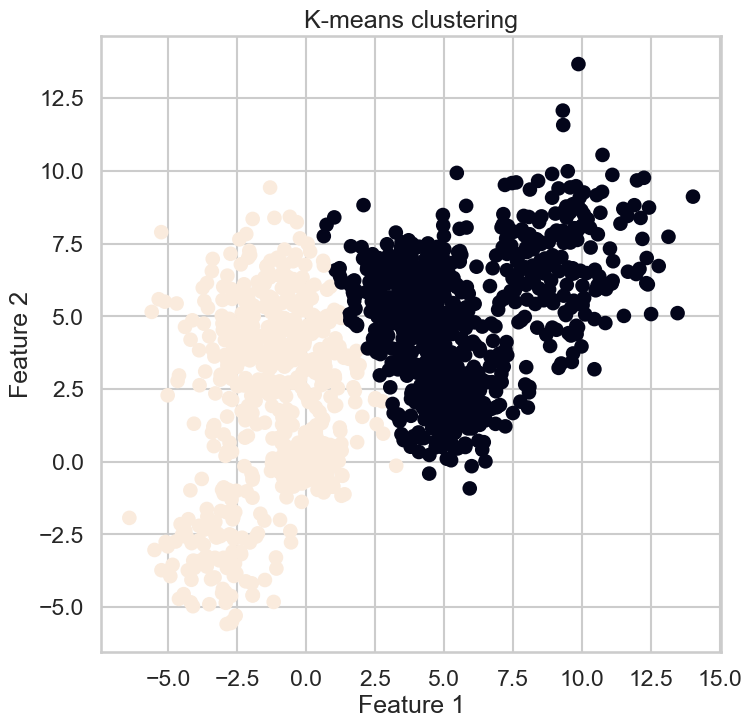

In [38]:
df = Multi_blob_Data
#Given Data Set 

# Specify number of clusters
num_clusters = 2

# initialize k-means model
kmean = KMeans(n_clusters=num_clusters)

# fit the model to the data
kmean.fit(df)
# Finding the centroids
kmean.cluster_centers_
# predict cluster labels for each data point
labels = kmean.predict(df)
silhouette_avg = silhouette_score(df, labels)
print(
    "For n_clusters =",
    num_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
    )

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df, labels)
plt.scatter(df[:, 0], df[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

Number of clusters from 2 to 8: 
 [2, 3, 4, 5, 6, 7]
For n_clusters = 2, silhouette score is 0.4751544541991239)
For n_clusters = 3, silhouette score is 0.43631793714185435)
For n_clusters = 4, silhouette score is 0.4628725400351352)
For n_clusters = 5, silhouette score is 0.48100602217073096)
For n_clusters = 6, silhouette score is 0.48609303184118463)
For n_clusters = 7, silhouette score is 0.46340972197949165)
[0.4751544541991239, 0.43631793714185435, 0.4628725400351352, 0.48100602217073096, 0.48609303184118463, 0.46340972197949165]


Text(0, 0.5, 'silhouette_score')

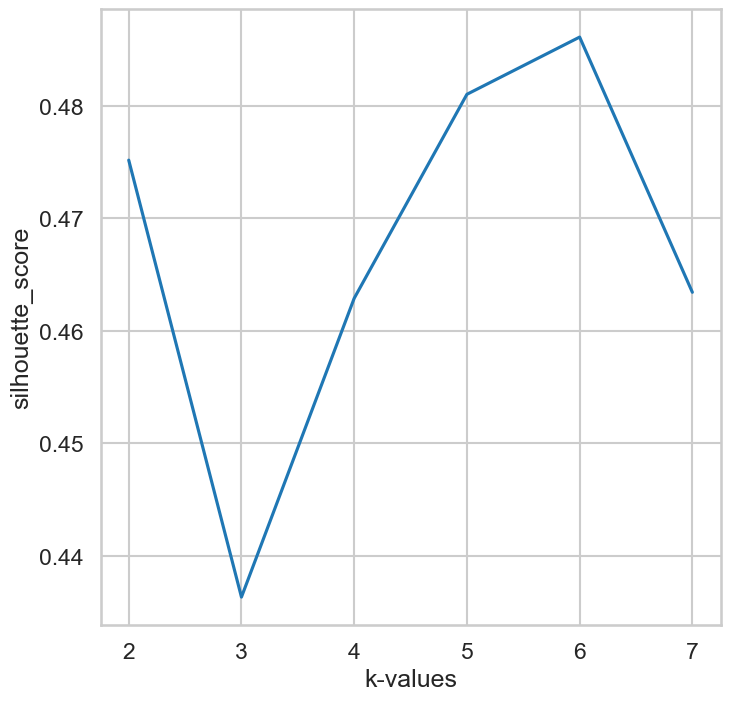

In [39]:
from sklearn.metrics import silhouette_score


df = Multi_blob_Data
arrayscore=[]
#Use silhouette score
range_n_clusters = list (range(2,8))
print ("Number of clusters from 2 to 8: \n", range_n_clusters)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    arrayscore.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(range_n_clusters, arrayscore)
print(arrayscore)
# naming the x axis
plt.xlabel('k-values')
# naming the y axis
plt.ylabel('silhouette_score')

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

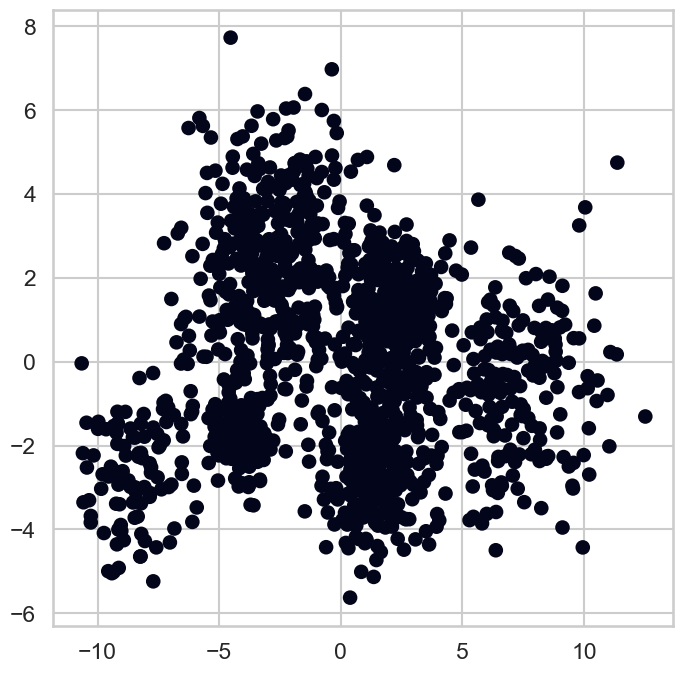

In [40]:
from sklearn.decomposition import PCA
df = Multi_blob_Data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
df = PCA(n_components=2).fit_transform(df)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='euclidean', linkage='average')
model.fit(df)
labels = model.labels_
plt.scatter(df[:, 0], df[:, 1], c=labels)
plt.show()

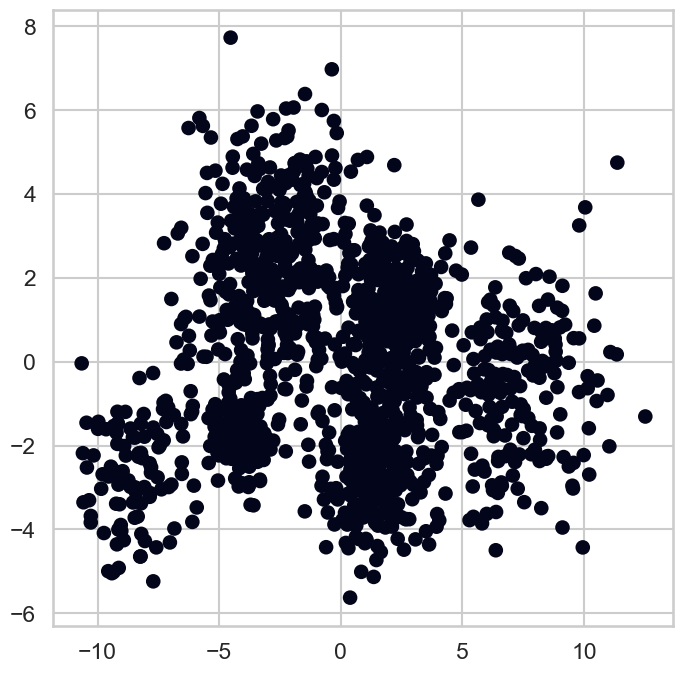

In [41]:
from sklearn.decomposition import PCA
df = Multi_blob_Data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
df = PCA(n_components=2).fit_transform(df)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=400.0,affinity='euclidean', linkage='single')
model.fit(df)
labels = model.labels_
plt.scatter(df[:, 0], df[:, 1], c=labels)
plt.show()

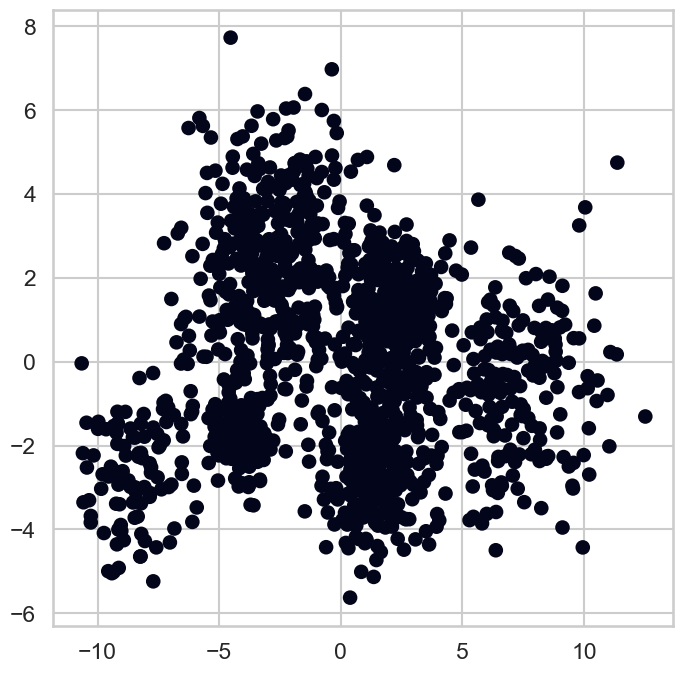

In [42]:
from sklearn.decomposition import PCA
df = Multi_blob_Data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
df = PCA(n_components=2).fit_transform(df) 
model = AgglomerativeClustering(n_clusters=None, distance_threshold=400.0,affinity='manhattan', linkage='average')
model.fit(df)
labels = model.labels_
plt.scatter(df[:, 0], df[:, 1], c=labels)
plt.show()

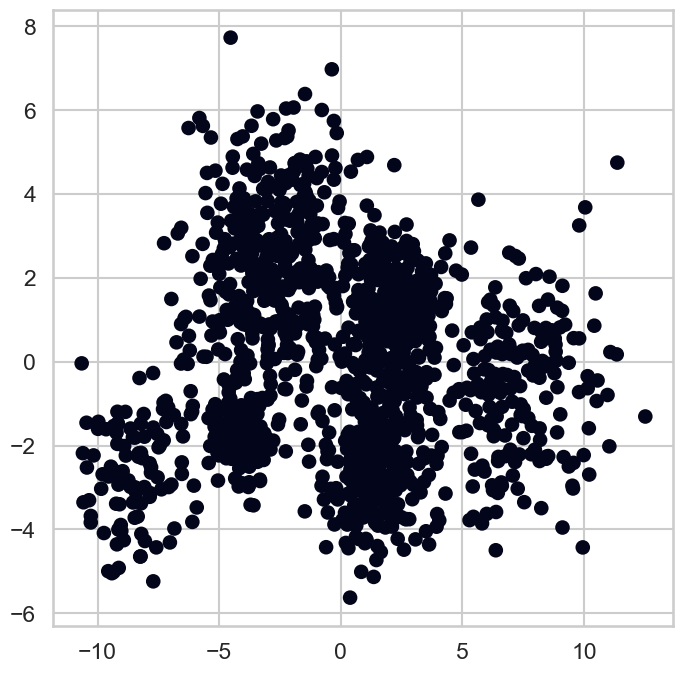

In [43]:
from sklearn.decomposition import PCA
df = Multi_blob_Data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
df = PCA(n_components=2).fit_transform(df) 
model = AgglomerativeClustering(n_clusters=None, distance_threshold=400.0,affinity='manhattan', linkage='single')
model.fit(df)
labels = model.labels_
plt.scatter(df[:, 0], df[:, 1], c=labels)
plt.show()

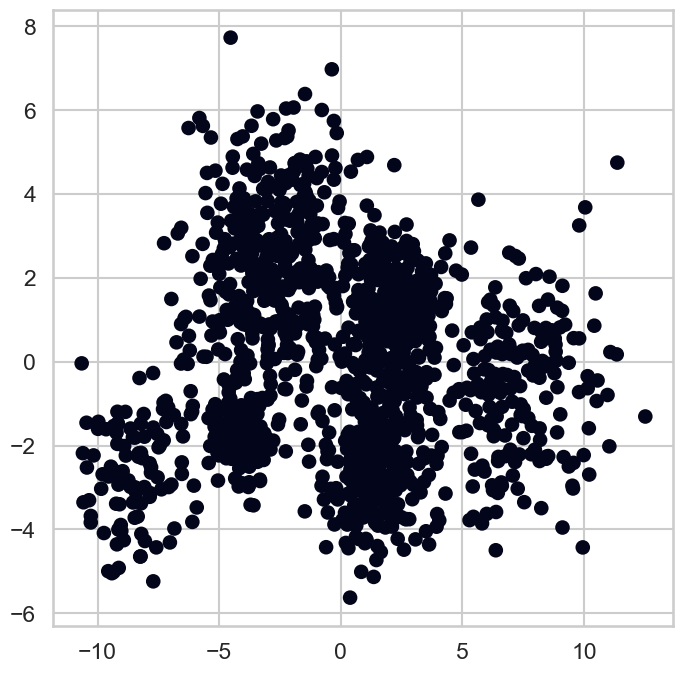

In [44]:
from sklearn.decomposition import PCA
df = Multi_blob_Data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
df = PCA(n_components=2).fit_transform(df) 
model = AgglomerativeClustering(n_clusters=None, distance_threshold=400.0, affinity='cosine', linkage='average')
model.fit(df)
labels = model.labels_
plt.scatter(df[:, 0], df[:, 1], c=labels)
plt.show()

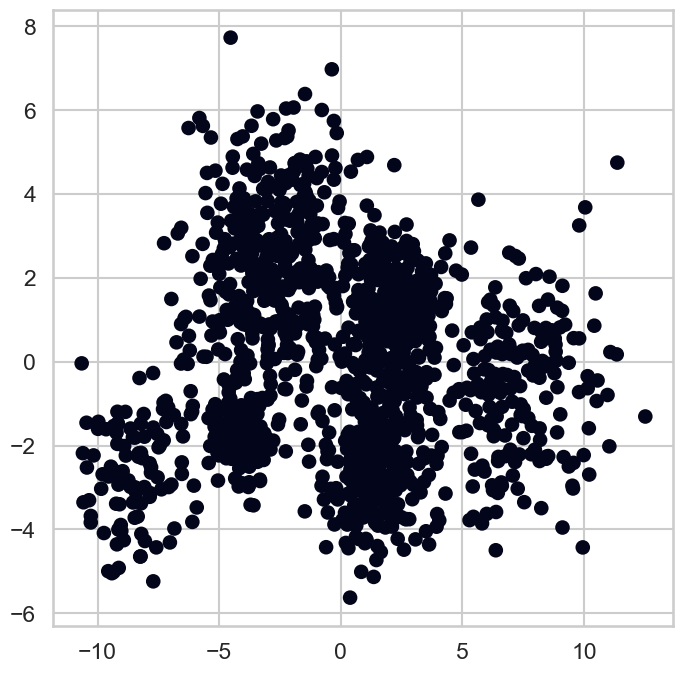

In [45]:
from sklearn.decomposition import PCA
df = Multi_blob_Data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
df = PCA(n_components=2).fit_transform(df) 
model = AgglomerativeClustering(n_clusters=None, distance_threshold=400.0, affinity='cosine', linkage='single')
model.fit(df)
labels = model.labels_
plt.scatter(df[:, 0], df[:, 1], c=labels)
plt.show()

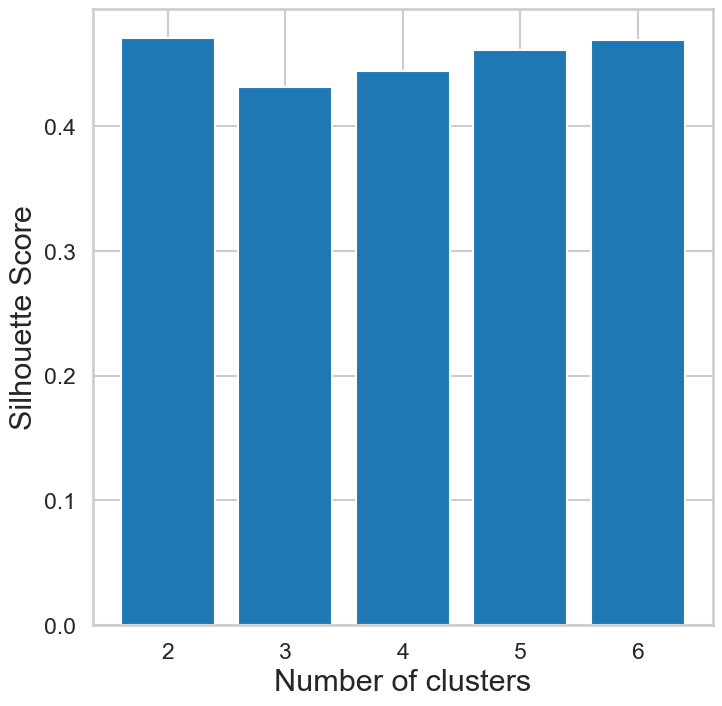

In [53]:
k = [2, 3, 4, 5, 6]
X = Multi_blob_Data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

ac2= AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)


# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 22)
plt.ylabel('Silhouette Score', fontsize = 22)
plt.show()

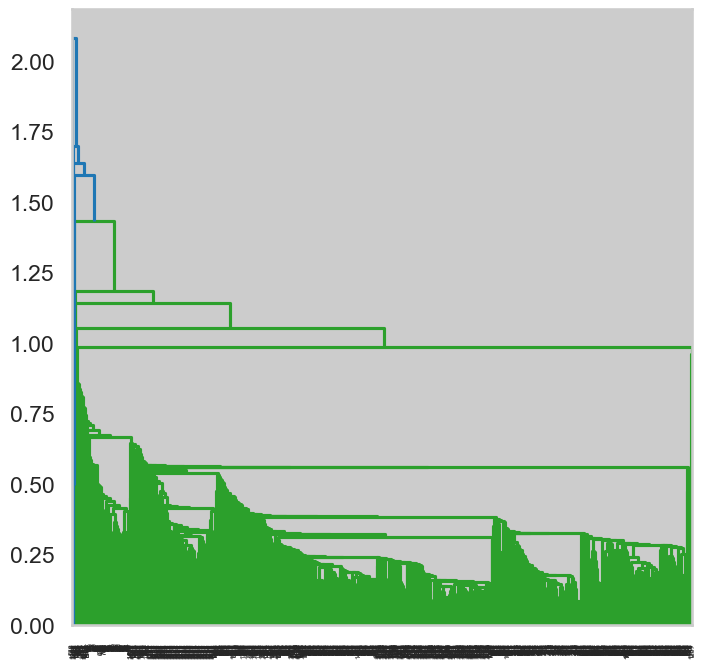

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

df=Multi_blob_Data
linkage_data = linkage(df, method='single', metric='euclidean')
dendrogram(linkage_data)

plt.show()

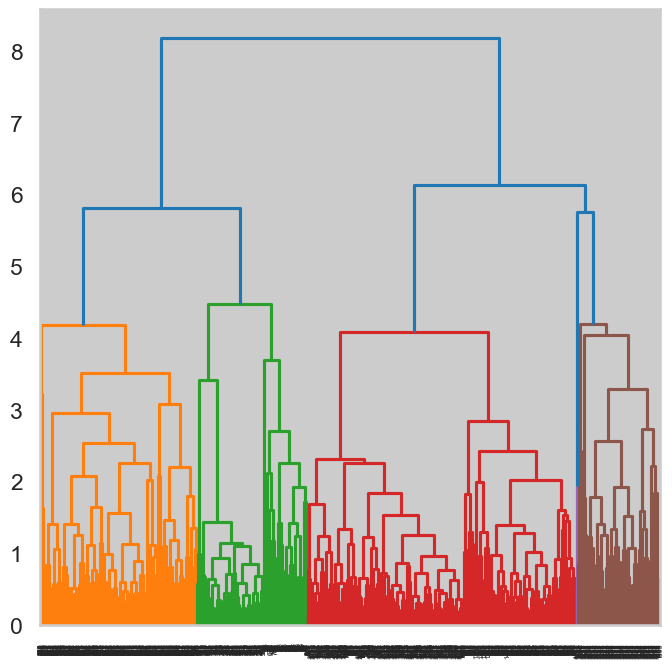

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

df=Multi_blob_Data
linkage_data = linkage(df, method='average', metric='euclidean')
dendrogram(linkage_data)

plt.show()

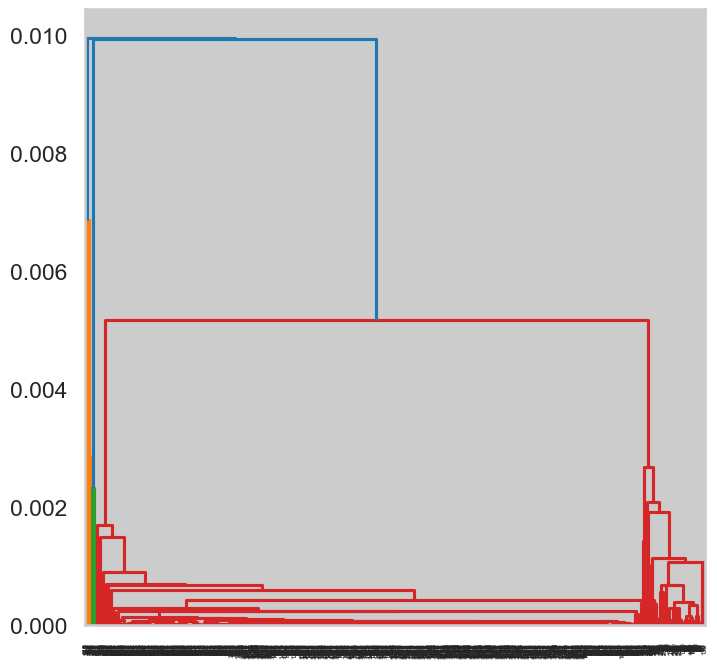

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

df=Multi_blob_Data
linkage_data = linkage(df, method='single', metric='cosine')
dendrogram(linkage_data)

plt.show()

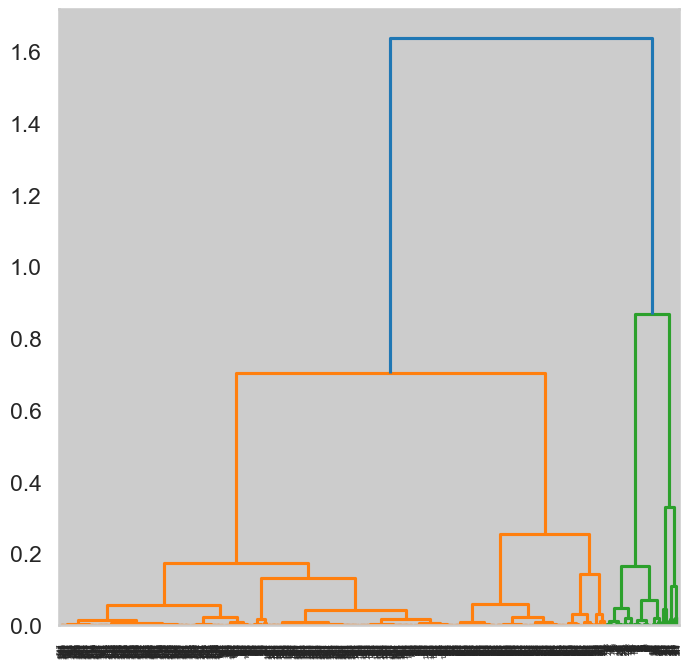

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

df=Multi_blob_Data
linkage_data = linkage(df, method='average', metric='cosine')
dendrogram(linkage_data)

plt.show()

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

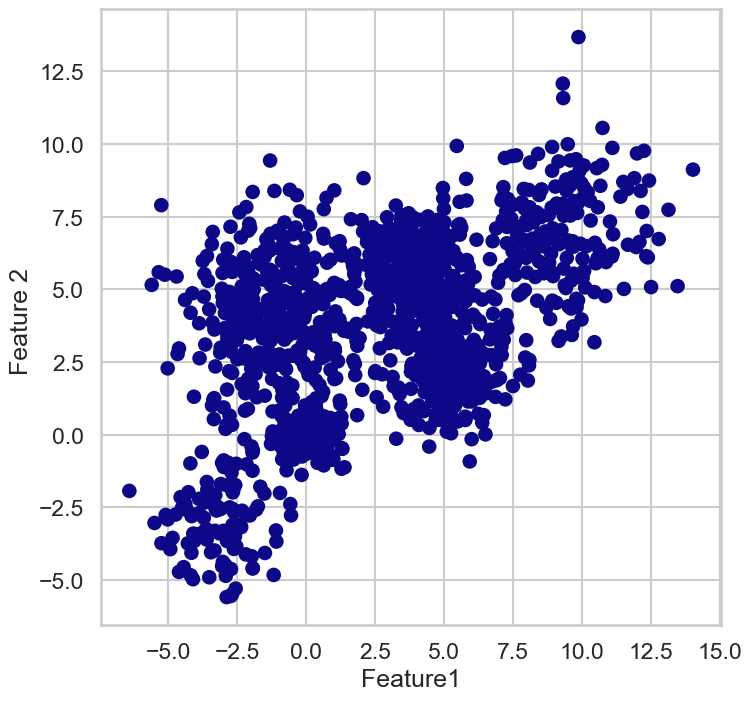

In [58]:
df = Multi_blob_Data
# cluster the data into five clusters
dbscan = DBSCAN(eps = 3, min_samples = 10).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(df[:, 0], df[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Feature1") # X-axis label
plt.ylabel("Feature 2 ") # Y-axis label
plt.show() # showing the plot

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

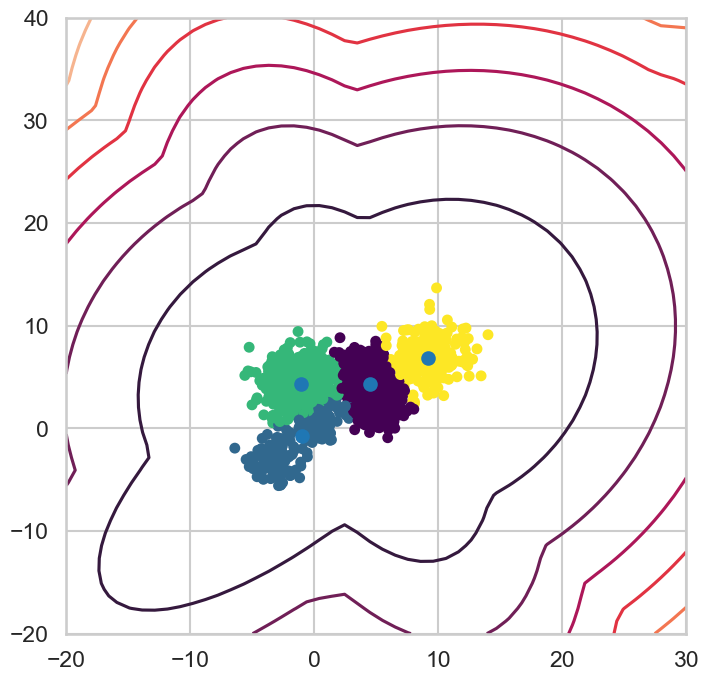

In [59]:
from sklearn.mixture import GaussianMixture as GMM
X2=Multi_blob_Data
modeln=GMM(n_components=4, covariance_type='full')
modeln. fit (X2) 
labelsn= modeln.predict (X2)
plt.scatter (X2[:, 0], X2[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

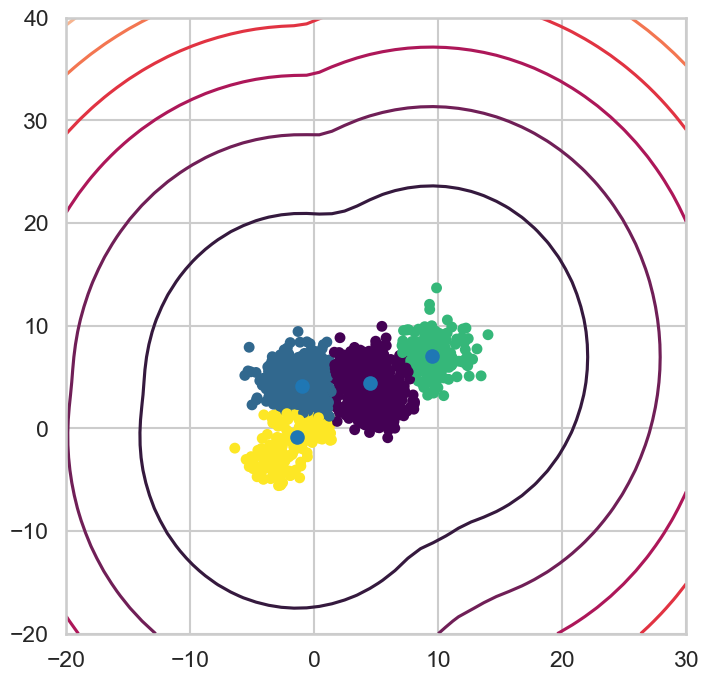

In [60]:
from sklearn.mixture import GaussianMixture as GMM
X2=Multi_blob_Data
modeln=GMM(n_components=4, covariance_type='tied')
modeln. fit (X2) 
labelsn= modeln.predict (X2)
plt.scatter (X2[:, 0], X2[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

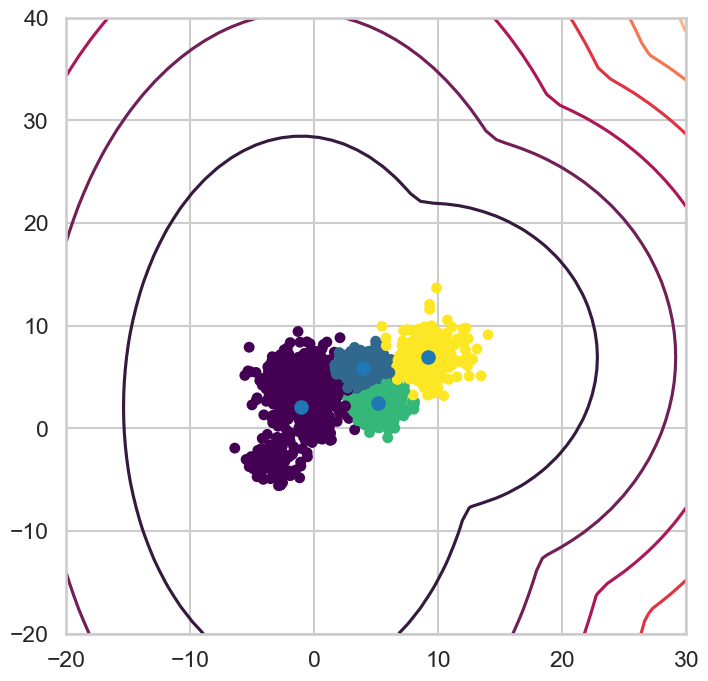

In [61]:
from sklearn.mixture import GaussianMixture as GMM
X2=Multi_blob_Data
modeln=GMM(n_components=4, covariance_type='diag')
modeln. fit (X2) 
labelsn= modeln.predict (X2)
plt.scatter (X2[:, 0], X2[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

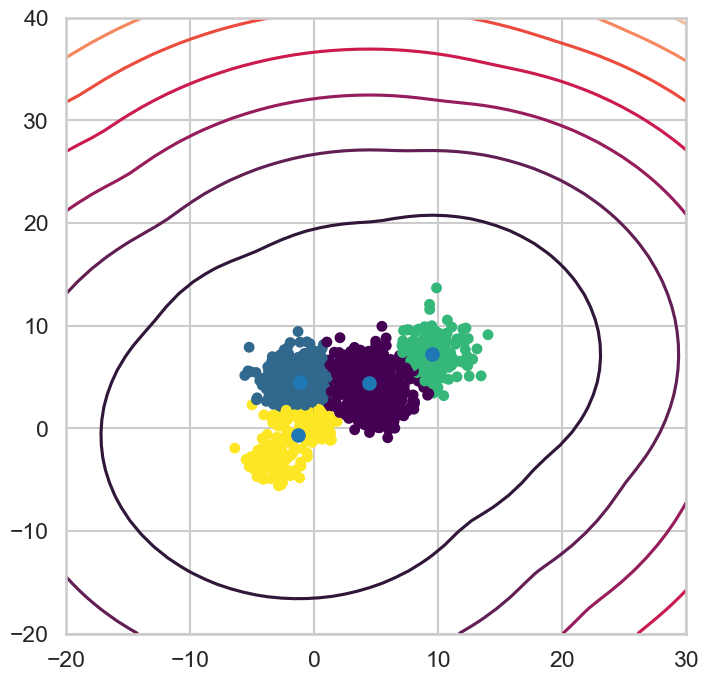

In [62]:
from sklearn.mixture import GaussianMixture as GMM
X2=Multi_blob_Data
modeln=GMM(n_components=4, covariance_type='spherical')
modeln. fit (X2) 
labelsn= modeln.predict (X2)
plt.scatter (X2[:, 0], X2[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [63]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

Number of clusters from 2 to 8: 
 [2, 3, 4, 5, 6, 7]
For n_clusters = 2, silhouette score is 0.6810461692117462)
For n_clusters = 3, silhouette score is 0.5528190123564095)
For n_clusters = 4, silhouette score is 0.49805050499728737)
For n_clusters = 5, silhouette score is 0.4887488870931056)
For n_clusters = 6, silhouette score is 0.3655218859995459)
For n_clusters = 7, silhouette score is 0.3475042328046161)
[0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.4887488870931056, 0.3655218859995459, 0.3475042328046161]


Text(0, 0.5, 'silhouette_score')

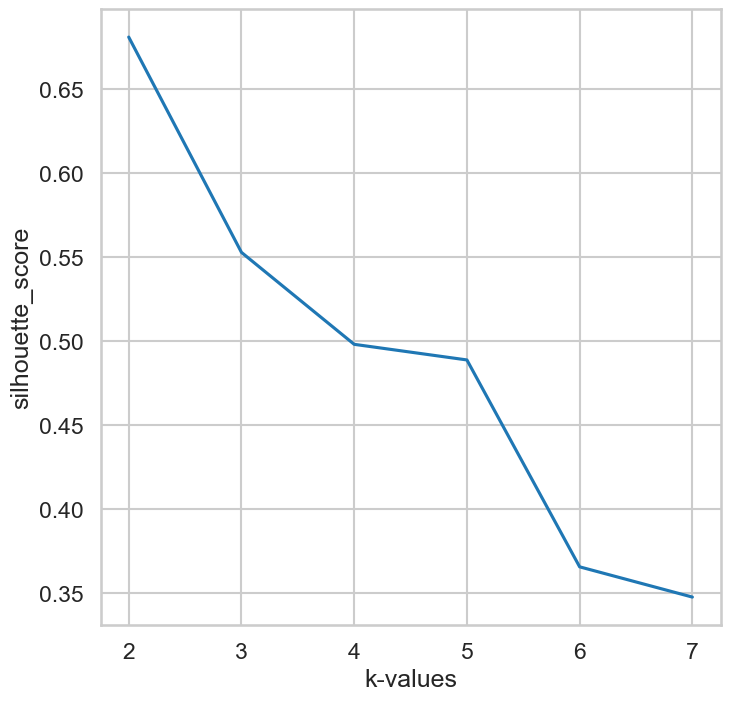

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the iris data
iris_data = load_iris()
X = iris_data.data
y = iris_data.target[[10, 25, 50]]
arrayscore=[]
#Use silhouette score
range_n_clusters = list (range(2,8))
print ("Number of clusters from 2 to 8: \n", range_n_clusters)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    arrayscore.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(range_n_clusters, arrayscore)
print(arrayscore)
# naming the x axis
plt.xlabel('k-values')
# naming the y axis
plt.ylabel('silhouette_score')

For n_clusters = 2


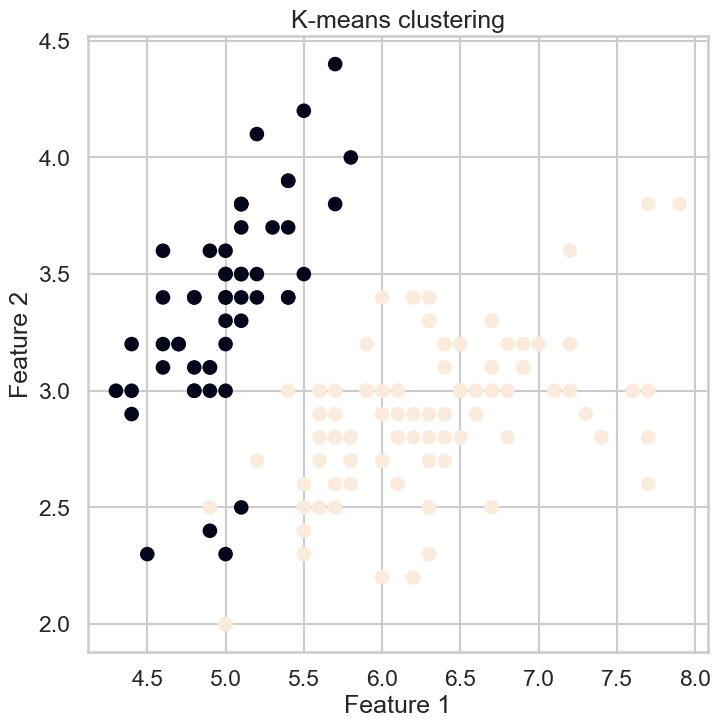

In [66]:
iris2 =iris_data.data
#Given Data Set 

# Specify number of clusters
num_clusters = 2

# initialize k-means model
kmean = KMeans(n_clusters=num_clusters)

# fit the model to the data
kmean.fit(iris2)
# Finding the centroids
kmean.cluster_centers_
# predict cluster labels for each data point
labels = kmean.predict(iris2)
silhouette_avg = silhouette_score(iris2, labels)
print(
    "For n_clusters =",
    num_clusters,

    )

# Compute the silhouette scores for each sample
labels = kmean.predict(iris2)
plt.scatter(iris2[:, 0], iris2[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

For n_clusters = 3


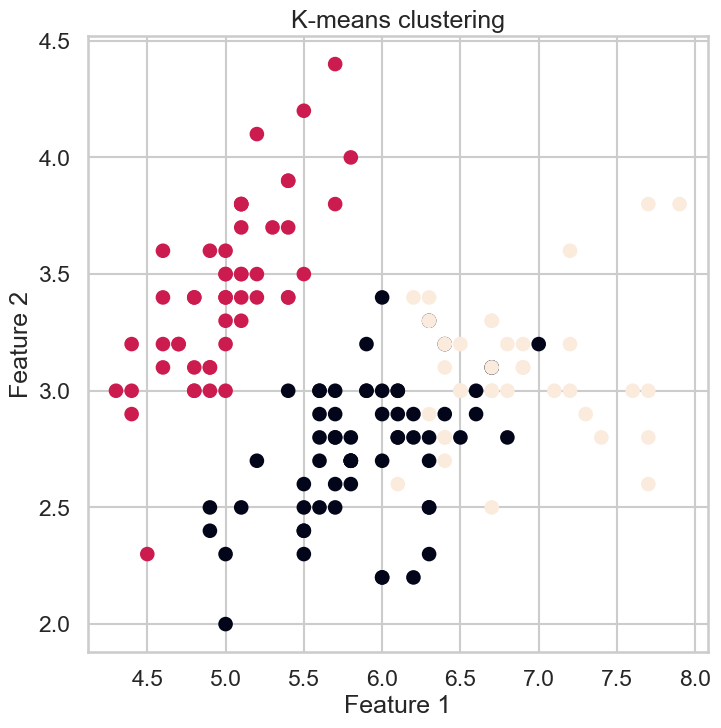

In [67]:
iris3 =iris_data.data
#Given Data Set 

# Specify number of clusters
num_clusters = 3

# initialize k-means model
kmean = KMeans(n_clusters=num_clusters)

# fit the model to the data
kmean.fit(iris3)
# Finding the centroids
kmean.cluster_centers_
# predict cluster labels for each data point
labels = kmean.predict(iris2)
silhouette_avg = silhouette_score(iris3, labels)
print(
    "For n_clusters =",
    num_clusters,

    )

# Compute the silhouette scores for each sample
labels = kmean.predict(iris3)
plt.scatter(iris3[:, 0], iris3[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

For n_clusters = 4


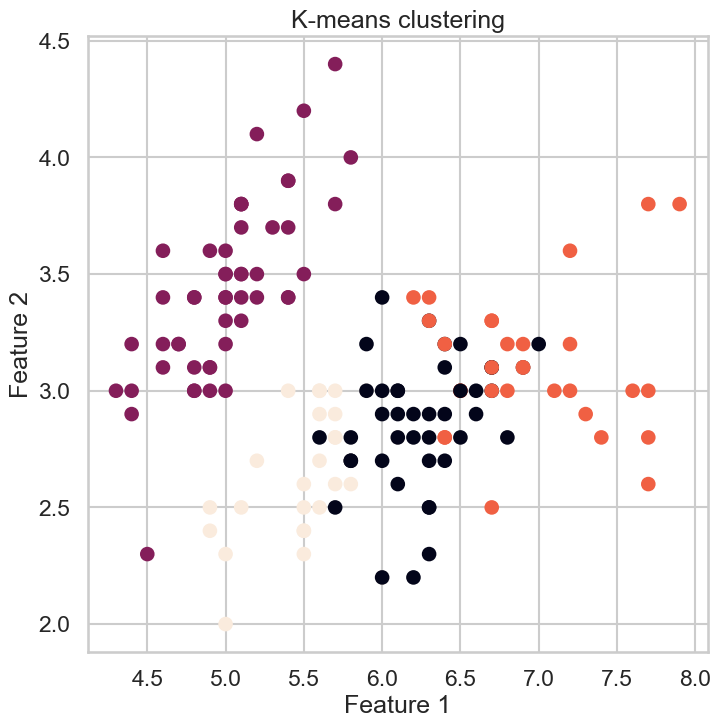

In [68]:
iris4 =iris_data.data
#Given Data Set 

# Specify number of clusters
num_clusters = 4

# initialize k-means model
kmean = KMeans(n_clusters=num_clusters)

# fit the model to the data
kmean.fit(iris4)
# Finding the centroids
kmean.cluster_centers_
# predict cluster labels for each data point
labels = kmean.predict(iris4)
silhouette_avg = silhouette_score(iris4, labels)
print(
    "For n_clusters =",
    num_clusters,

    )

# Compute the silhouette scores for each sample
labels = kmean.predict(iris4)
plt.scatter(iris4[:, 0], iris4[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

In [69]:
### Hierarchal Clustering For Iris


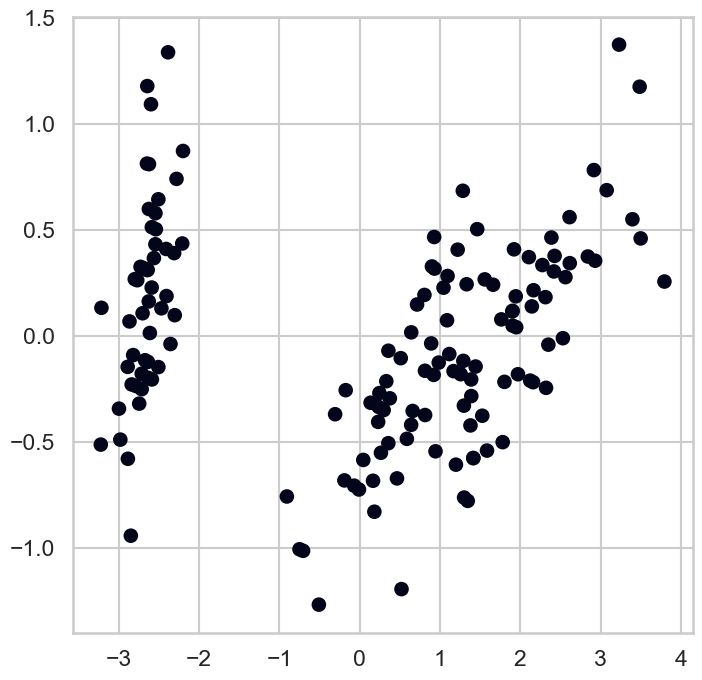

In [70]:
from sklearn.decomposition import PCA
irisdata =iris_data.data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(irisdata)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='euclidean', linkage='average')
model.fit(irisdata)
labels = model.labels_
plt.scatter(irisdata[:, 0], irisdata[:, 1], c=labels)
plt.show()

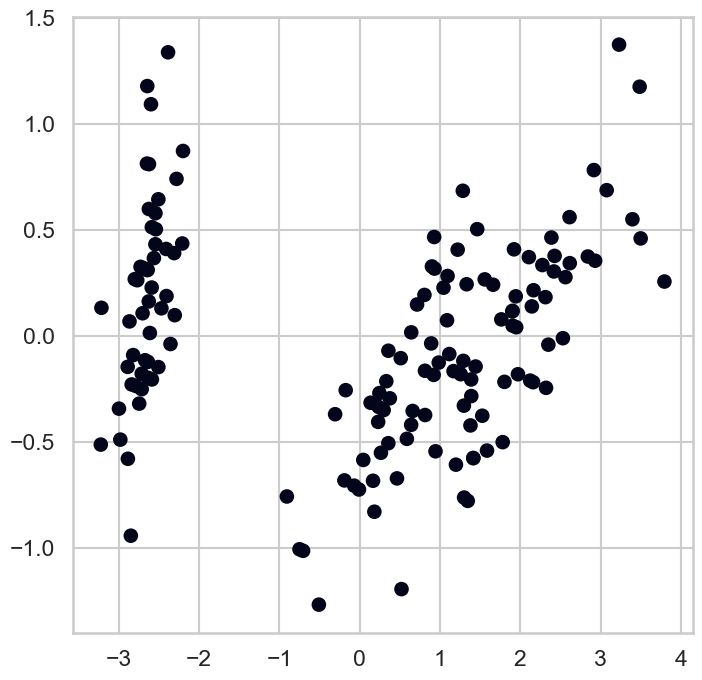

In [71]:
from sklearn.decomposition import PCA
irisdata =iris_data.data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
df = PCA(n_components=2).fit_transform(irisdata)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='euclidean', linkage='single')
model.fit(irisdata)
labels = model.labels_
plt.scatter(df[:, 0], df[:, 1], c=labels)
plt.show()

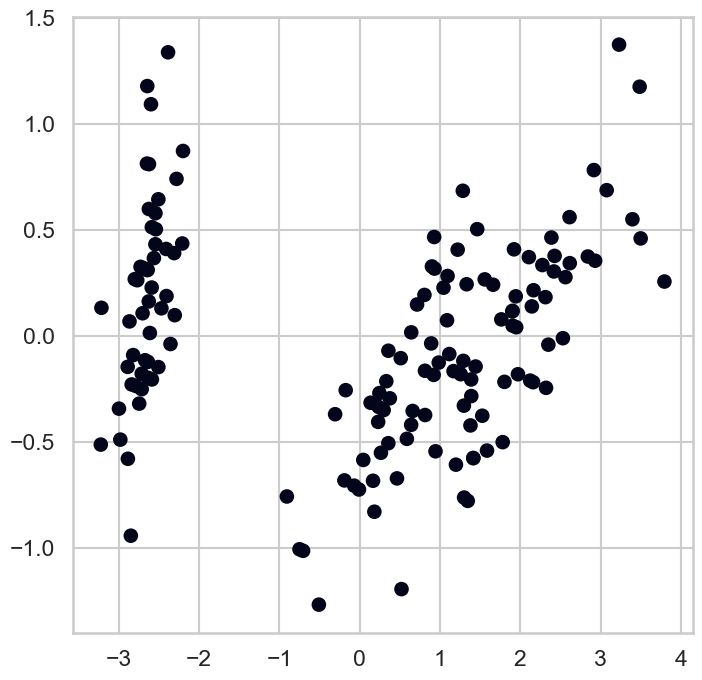

In [72]:
from sklearn.decomposition import PCA
irisdata =iris_data.data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(irisdata)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='manhattan', linkage='average')
model.fit(irisdata)
labels = model.labels_
plt.scatter(irisdata[:, 0], irisdata[:, 1], c=labels)
plt.show()

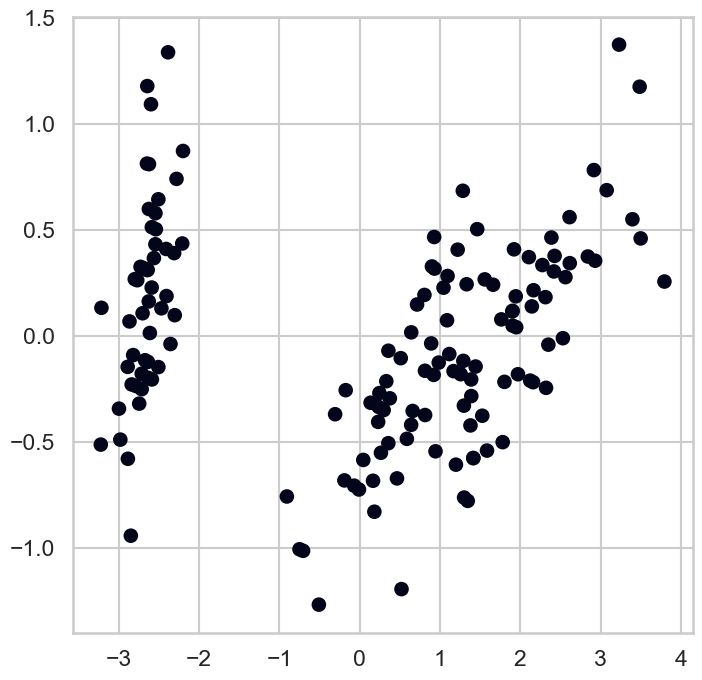

In [73]:
from sklearn.decomposition import PCA
irisdata =iris_data.data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(irisdata)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='manhattan', linkage='single')
model.fit(irisdata)
labels = model.labels_
plt.scatter(irisdata[:, 0], irisdata[:, 1], c=labels)
plt.show()

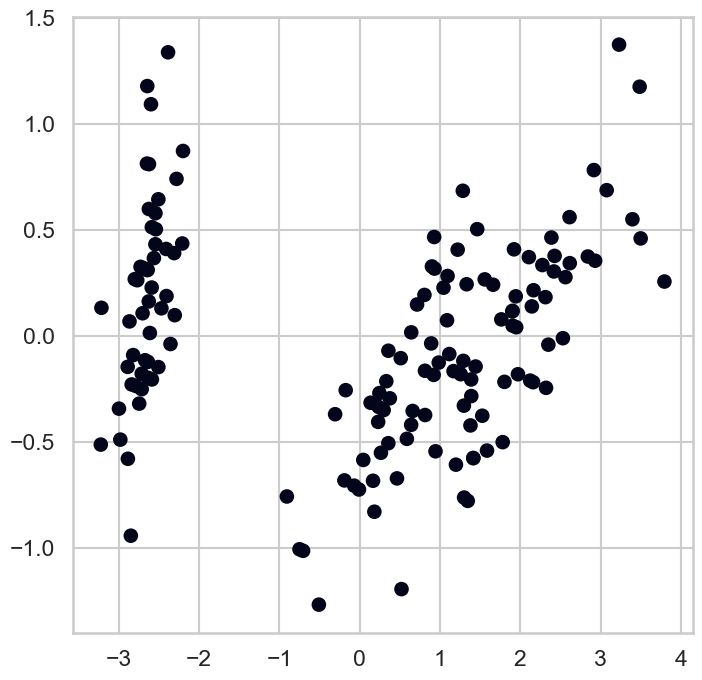

In [74]:
from sklearn.decomposition import PCA
irisdata =iris_data.data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(irisdata)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='cosine', linkage='average')
model.fit(irisdata)
labels = model.labels_
plt.scatter(irisdata[:, 0], irisdata[:, 1], c=labels)
plt.show()

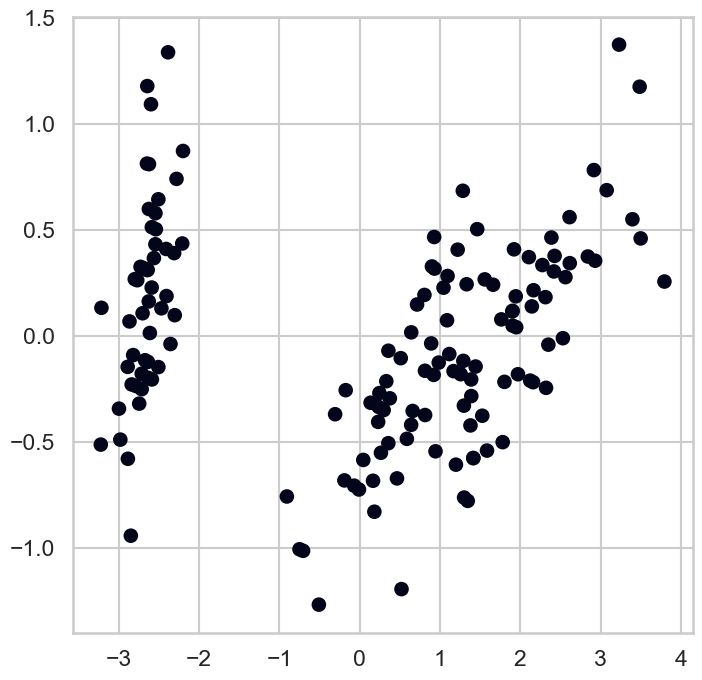

In [75]:
from sklearn.decomposition import PCA
irisdata =iris_data.data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(irisdata)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='cosine', linkage='average')
model.fit(irisdata)
labels = model.labels_
plt.scatter(irisdata[:, 0], irisdata[:, 1], c=labels)
plt.show()

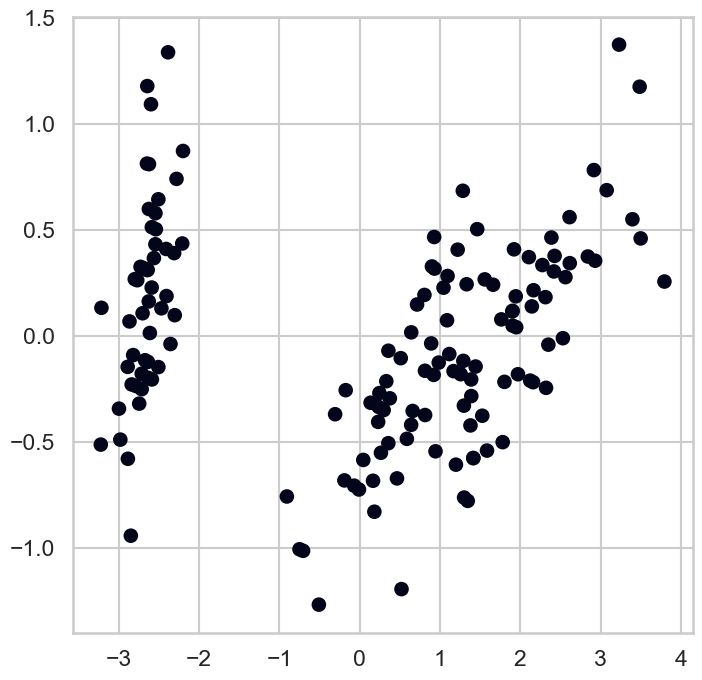

In [76]:
from sklearn.decomposition import PCA
irisdata =iris_data.data
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(irisdata)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='cosine', linkage='single')
model.fit(irisdata)
labels = model.labels_
plt.scatter(irisdata[:, 0], irisdata[:, 1], c=labels)
plt.show()

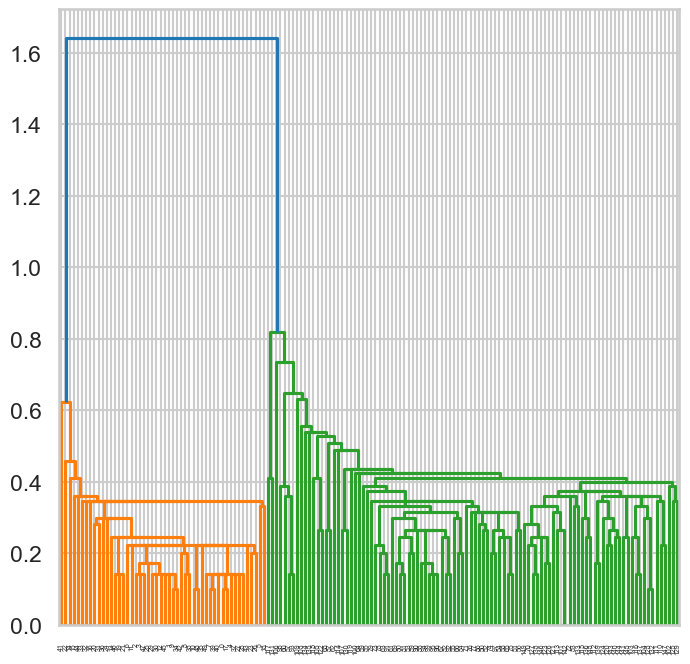

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

irisdata =iris_data.data
linkage_data = linkage(irisdata, method='single', metric='euclidean')
dendrogram(linkage_data)

plt.show()

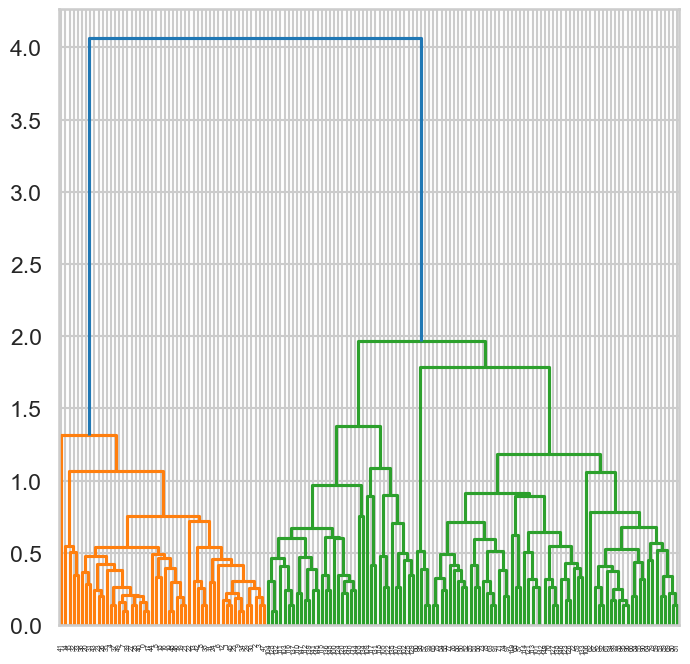

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

irisdata =iris_data.data
linkage_data = linkage(irisdata, method='average', metric='euclidean')
dendrogram(linkage_data)

plt.show()

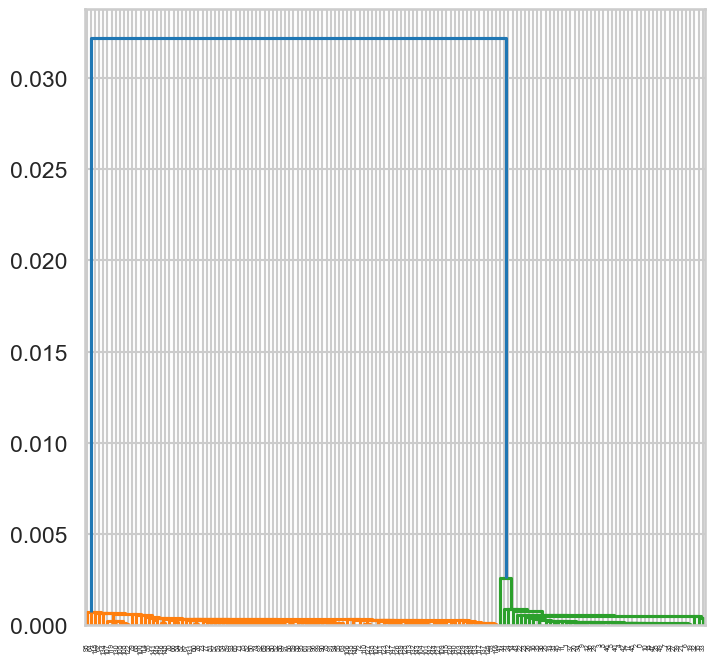

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

irisdata =iris_data.data
linkage_data = linkage(irisdata, method='single', metric='cosine')
dendrogram(linkage_data)

plt.show()

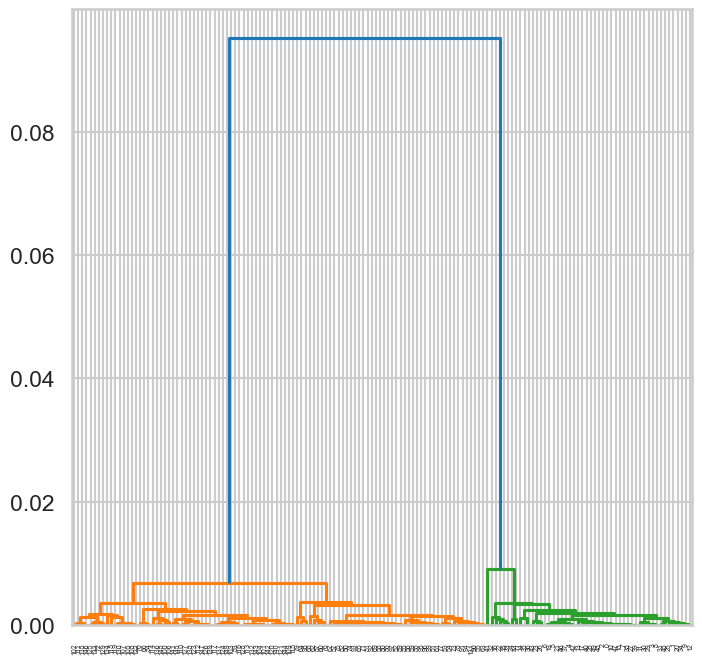

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

irisdata =iris_data.data
linkage_data = linkage(irisdata, method='average', metric='cosine')
dendrogram(linkage_data)

plt.show()

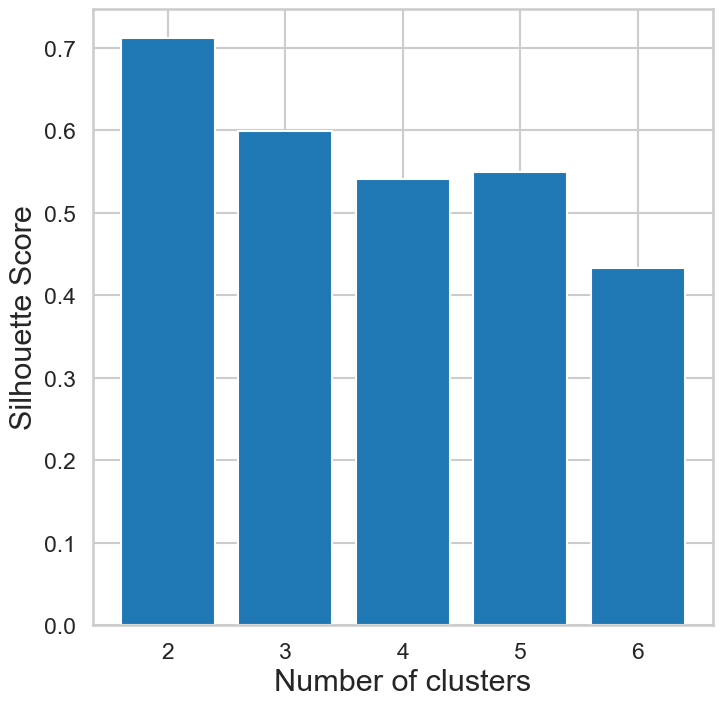

In [81]:
k = [2, 3, 4, 5, 6]
X = iris_data.data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

ac2= AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)


# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 22)
plt.ylabel('Silhouette Score', fontsize = 22)
plt.show()

In [82]:
###DBSCAN


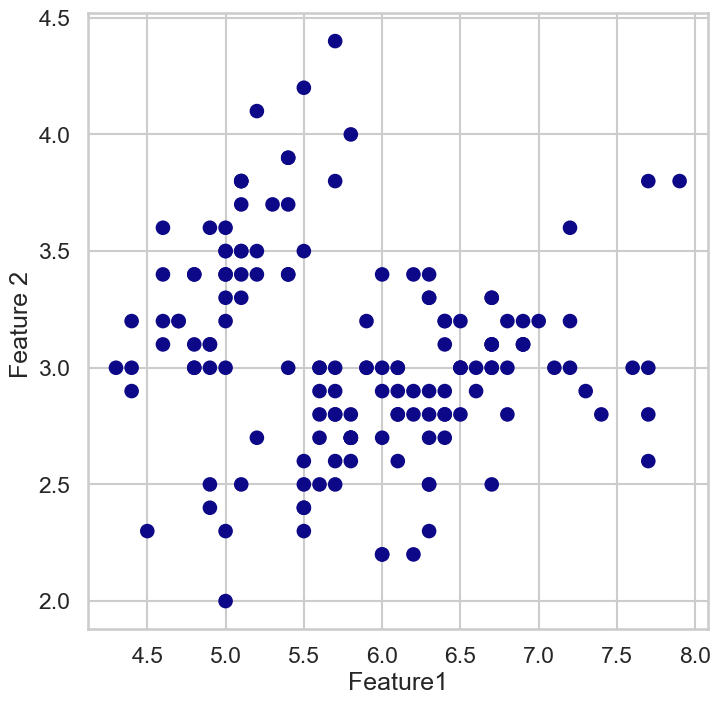

In [84]:
irisdata =iris_data.data
# cluster the data into five clusters
dbscan = DBSCAN(eps = 3, min_samples = 10).fit(irisdata) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(irisdata[:, 0], irisdata[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Feature1") # X-axis label
plt.ylabel("Feature 2 ") # Y-axis label
plt.show() # showing the plot

In [85]:
###Gaussian Mixture

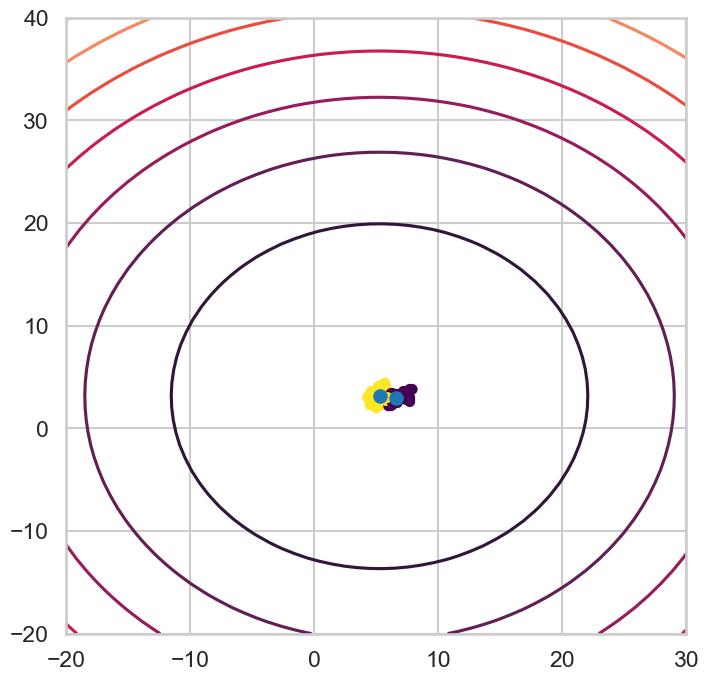

In [86]:
from sklearn.mixture import GaussianMixture as GMM
X2=iris_data.data
X2 = iris_data.data[:, :2]  # Take the first two features
modeln=GMM(n_components=2, covariance_type='spherical')
modeln. fit (X2) 
labelsn= modeln.predict (X2)
plt.scatter (X2[:, 0], X2[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

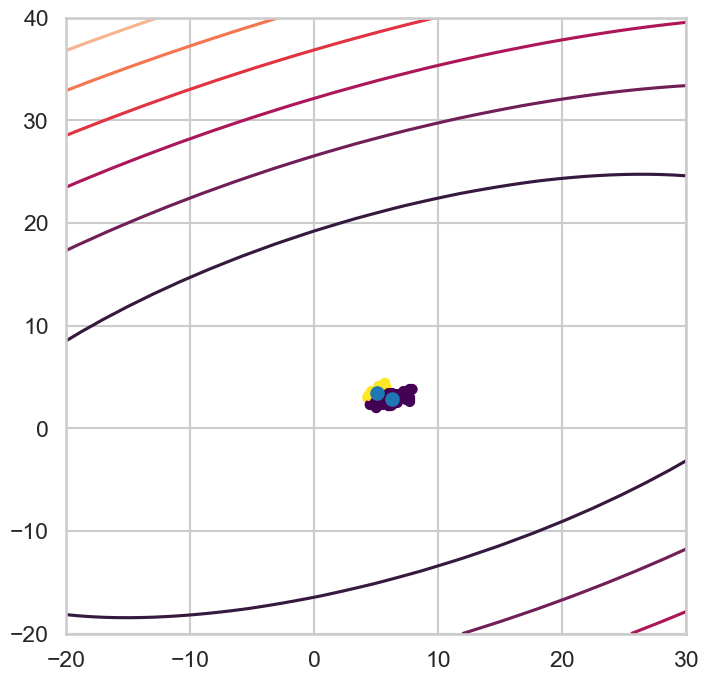

In [131]:
from sklearn.mixture import GaussianMixture as GMM
X2=iris_data.data
X2 = iris_data.data[:, :2]  # Take the first two features
modeln=GMM(n_components=2, covariance_type='tied')
modeln. fit (X2) 
labelsn= modeln.predict (X2)
plt.scatter (X2[:, 0], X2[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

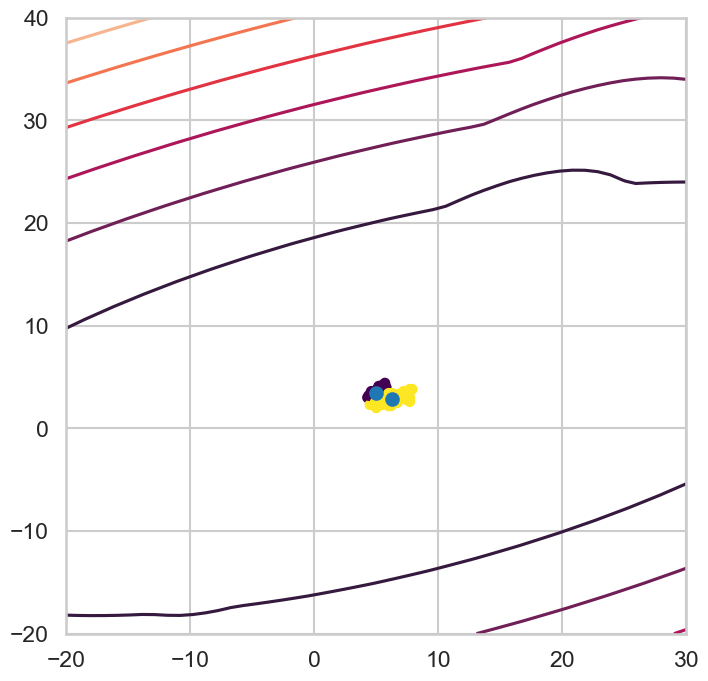

In [132]:
from sklearn.mixture import GaussianMixture as GMM
X2=iris_data.data
X2 = iris_data.data[:, :2]  # Take the first two features
modeln=GMM(n_components=2, covariance_type='full')
modeln. fit (X2) 
labelsn= modeln.predict (X2)
plt.scatter (X2[:, 0], X2[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

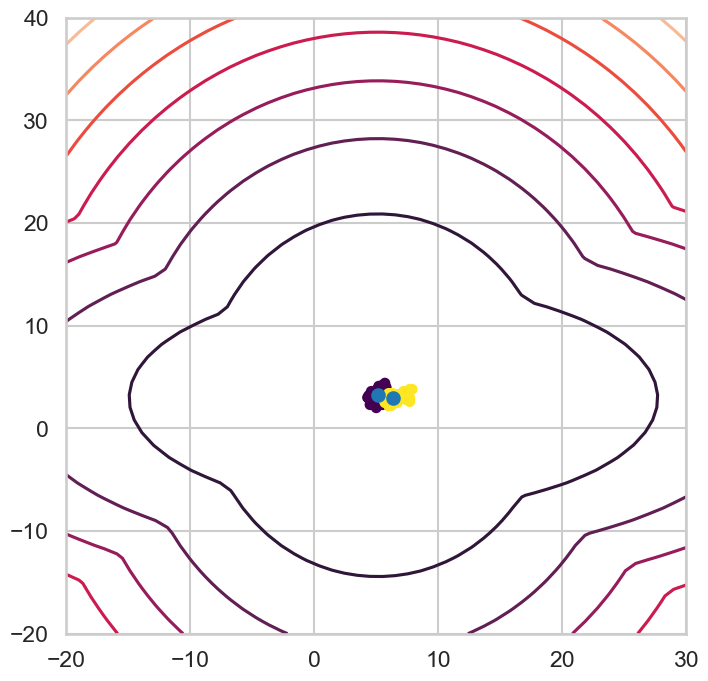

In [133]:
from sklearn.mixture import GaussianMixture as GMM
X2=iris_data.data
X2 = iris_data.data[:, :2]  # Take the first two features
modeln=GMM(n_components=2, covariance_type='diag')
modeln. fit (X2) 
labelsn= modeln.predict (X2)
plt.scatter (X2[:, 0], X2[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

In [ ]:
##Then Normalize the data and visualise the difference

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
X2=iris_data.data
# Standardize the data
scalar = StandardScaler()
Xscalar = scalar.fit_transform(X2)
# Normalizing the scaled data using MinMaxScaler
Customernormalize = MinMaxScaler()
Xnormalized = Customernormalize.fit_transform(Xscalar)
# Instantiate PA object with desired number of components
Customerpca = PCA(n_components=2)
# Fit and transform the data
X2final = Customerpca.fit_transform(Xnormalized)

For n_clusters = 2


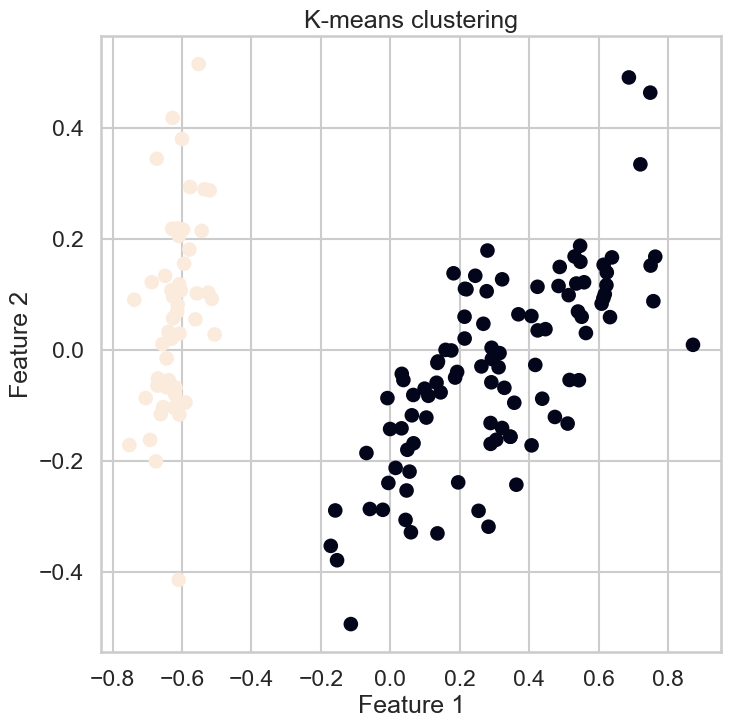

In [157]:


# Specify number of clusters
num_clusters = 2

# initialize k-means model
kmean = KMeans(n_clusters=num_clusters)

# fit the model to the data
kmean.fit(X2final)
# Finding the centroids
kmean.cluster_centers_
# predict cluster labels for each data point
labels = kmean.predict(X2final)
silhouette_avg = silhouette_score(X2final, labels)
print(
    "For n_clusters =",
    num_clusters,

    )

# Compute the silhouette scores for each sample
labels = kmean.predict(X2final)
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

For n_clusters = 3


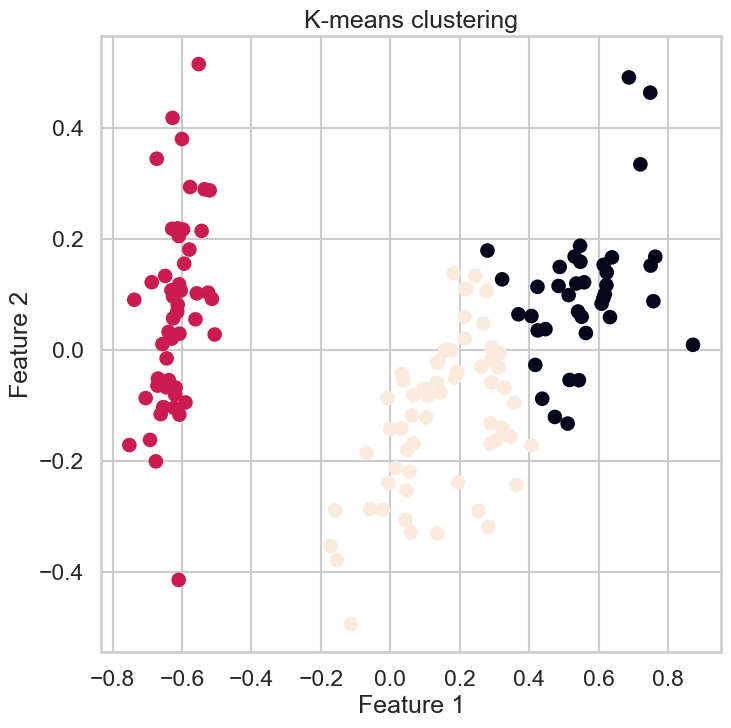

In [156]:


# Specify number of clusters
num_clusters = 3

# initialize k-means model
kmean = KMeans(n_clusters=num_clusters)

# fit the model to the data
kmean.fit(X2final)
# Finding the centroids
kmean.cluster_centers_
# predict cluster labels for each data point
labels = kmean.predict(X2final)
silhouette_avg = silhouette_score(X2final, labels)
print(
    "For n_clusters =",
    num_clusters,

    )

# Compute the silhouette scores for each sample
labels = kmean.predict(X2final)
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

For n_clusters = 4


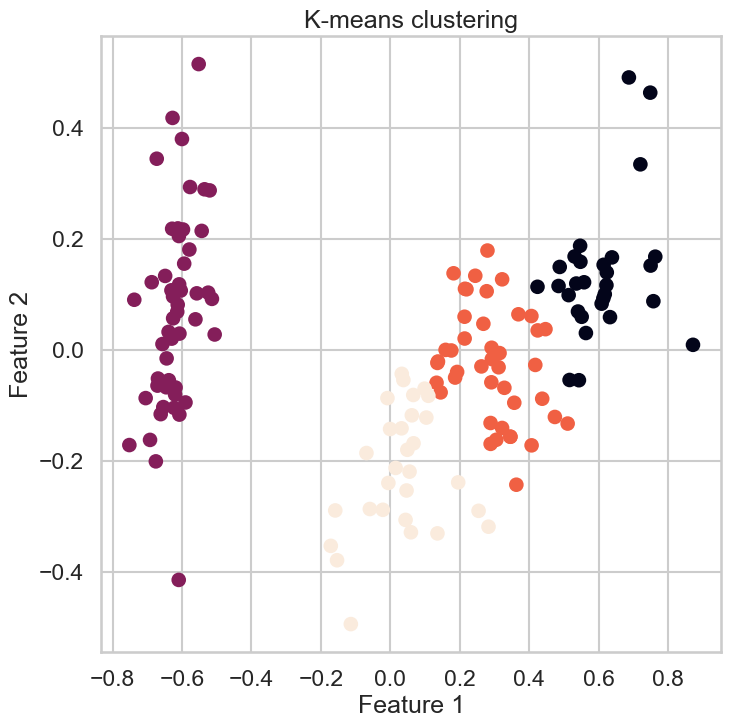

In [158]:


# Specify number of clusters
num_clusters = 4

# initialize k-means model
kmean = KMeans(n_clusters=num_clusters)

# fit the model to the data
kmean.fit(X2final)
# Finding the centroids
kmean.cluster_centers_
# predict cluster labels for each data point
labels = kmean.predict(X2final)
silhouette_avg = silhouette_score(X2final, labels)
print(
    "For n_clusters =",
    num_clusters,

    )

# Compute the silhouette scores for each sample
labels = kmean.predict(X2final)
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

For n_clusters = 5


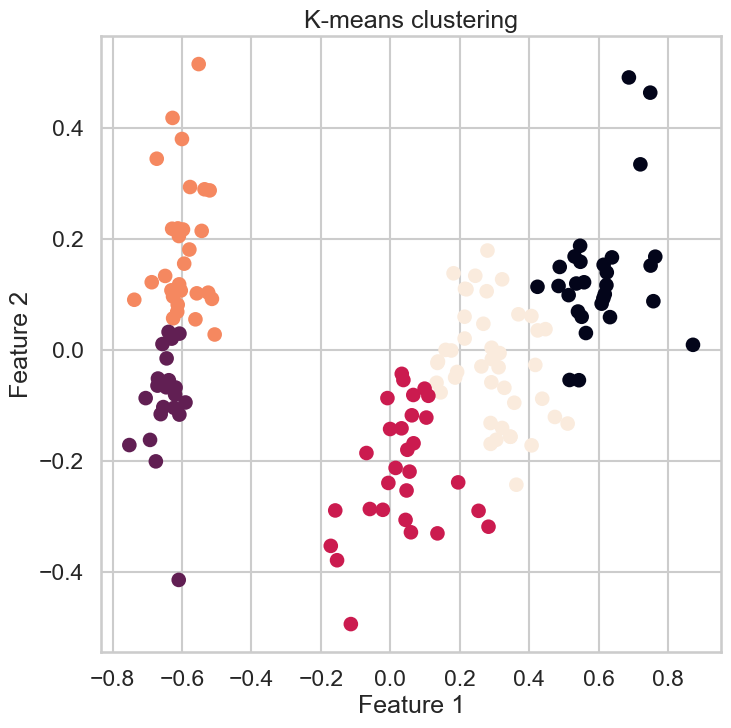

In [159]:


# Specify number of clusters
num_clusters = 5

# initialize k-means model
kmean = KMeans(n_clusters=num_clusters)

# fit the model to the data
kmean.fit(X2final)
# Finding the centroids
kmean.cluster_centers_
# predict cluster labels for each data point
labels = kmean.predict(X2final)
silhouette_avg = silhouette_score(X2final, labels)
print(
    "For n_clusters =",
    num_clusters,

    )

# Compute the silhouette scores for each sample
labels = kmean.predict(X2final)
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

For n_clusters = 6


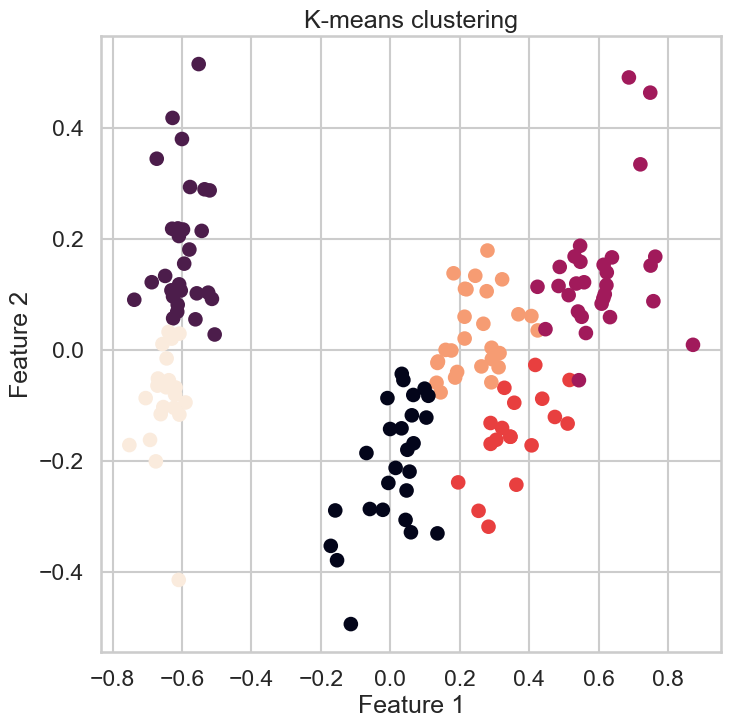

In [160]:


# Specify number of clusters
num_clusters = 6

# initialize k-means model
kmean = KMeans(n_clusters=num_clusters)

# fit the model to the data
kmean.fit(X2final)
# Finding the centroids
kmean.cluster_centers_
# predict cluster labels for each data point
labels = kmean.predict(X2final)
silhouette_avg = silhouette_score(X2final, labels)
print(
    "For n_clusters =",
    num_clusters,

    )

# Compute the silhouette scores for each sample
labels = kmean.predict(X2final)
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means clustering')
plt.show()

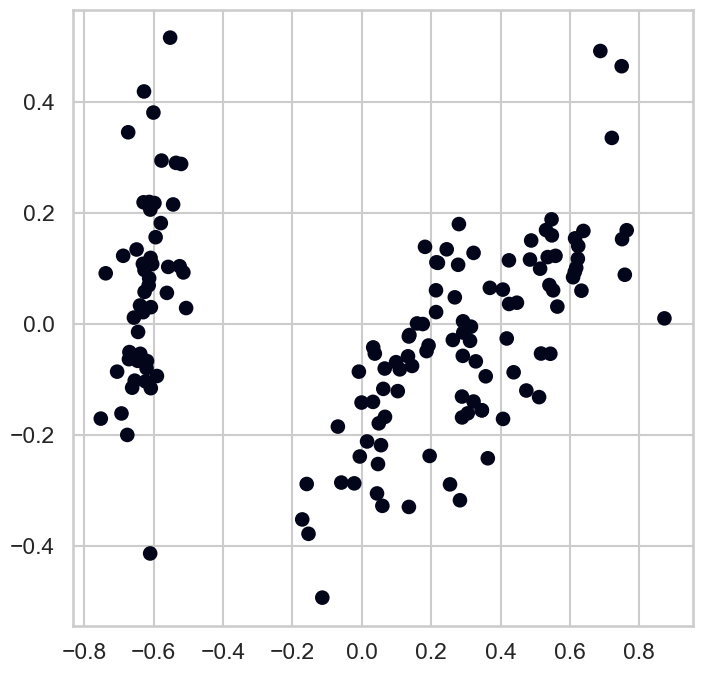

In [162]:
from sklearn.decomposition import PCA

#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(X2final)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='euclidean', linkage='average')
model.fit(X2final)
labels = model.labels_
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.show()

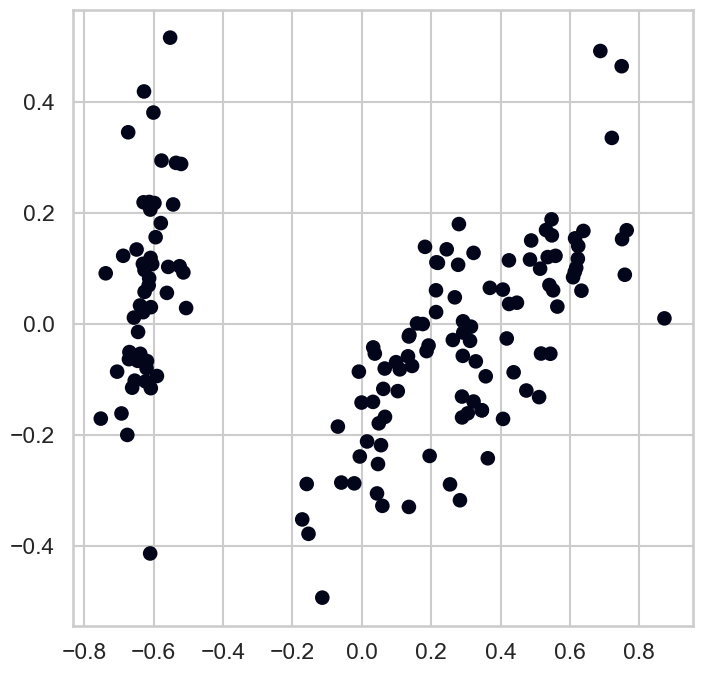

In [163]:
from sklearn.decomposition import PCA

#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(X2final)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='euclidean', linkage='single')
model.fit(X2final)
labels = model.labels_
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.show()

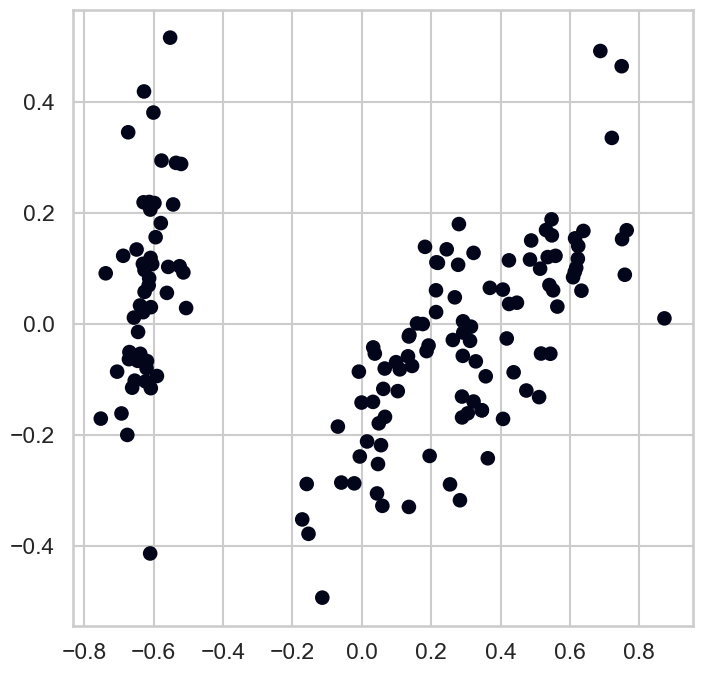

In [164]:
from sklearn.decomposition import PCA

#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(X2final)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='manhattan', linkage='average')
model.fit(X2final)
labels = model.labels_
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.show()

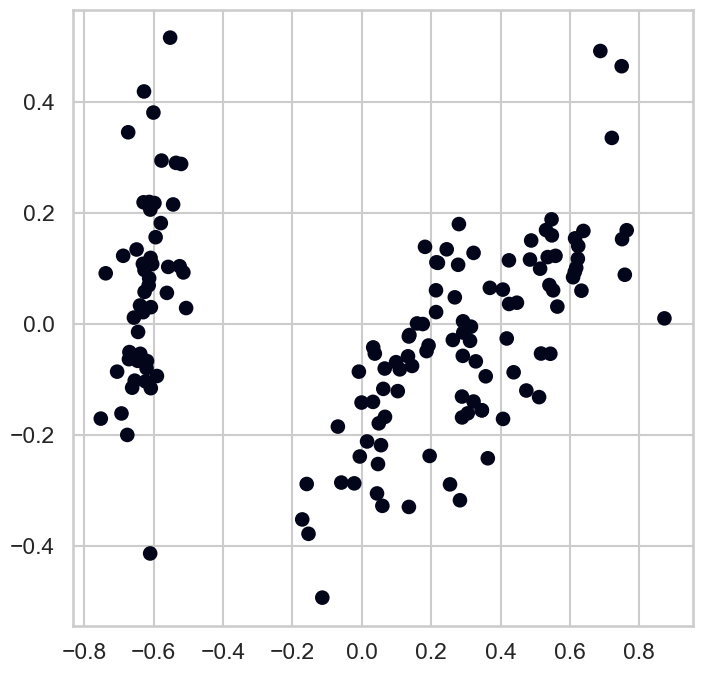

In [165]:
from sklearn.decomposition import PCA

#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(X2final)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='manhattan', linkage='single')
model.fit(X2final)
labels = model.labels_
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.show()

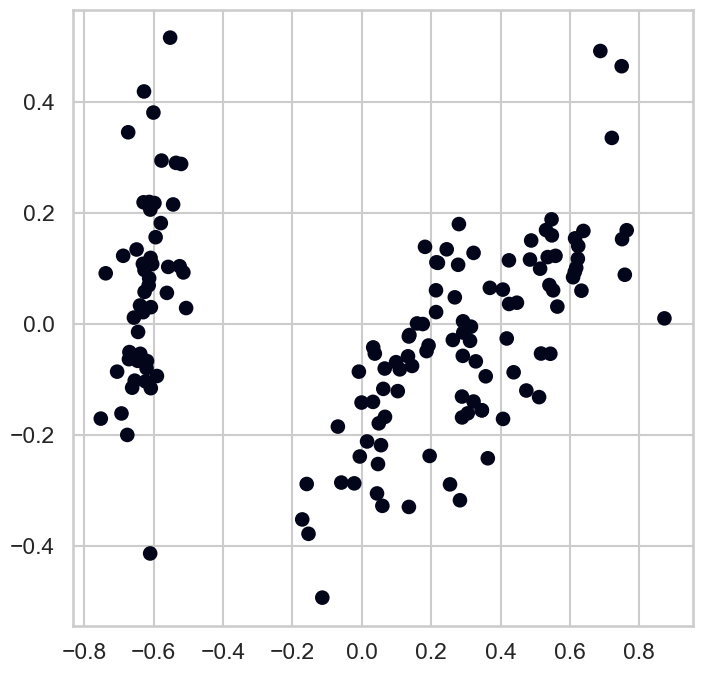

In [166]:
from sklearn.decomposition import PCA

#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(X2final)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='cosine', linkage='average')
model.fit(X2final)
labels = model.labels_
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.show()

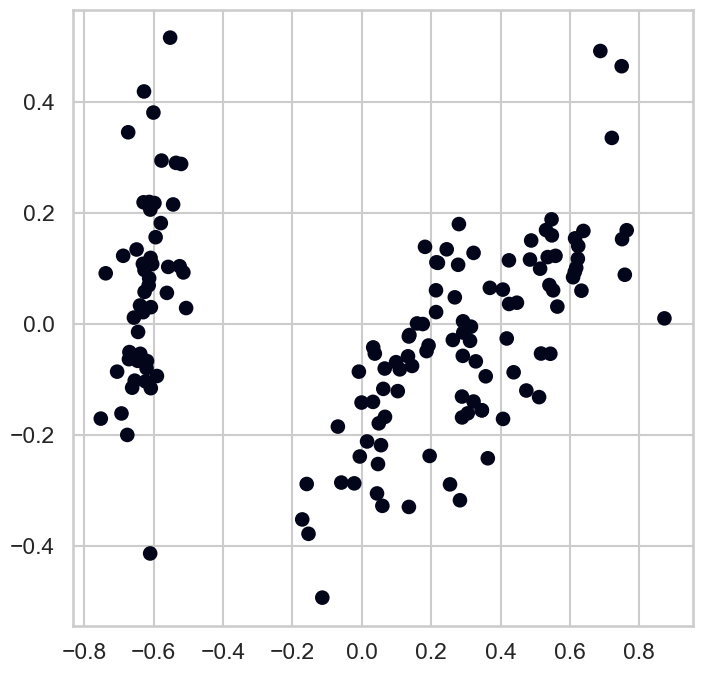

In [167]:
from sklearn.decomposition import PCA

#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
irisdata = PCA(n_components=2).fit_transform(X2final)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='cosine', linkage='single')
model.fit(X2final)
labels = model.labels_
plt.scatter(X2final[:, 0], X2final[:, 1], c=labels)
plt.show()

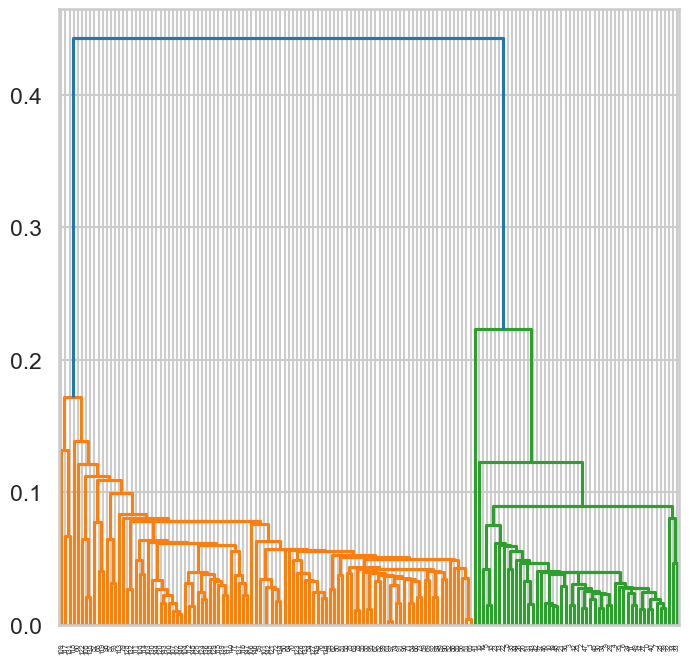

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X2final, method='single', metric='euclidean')
dendrogram(linkage_data)

plt.show()

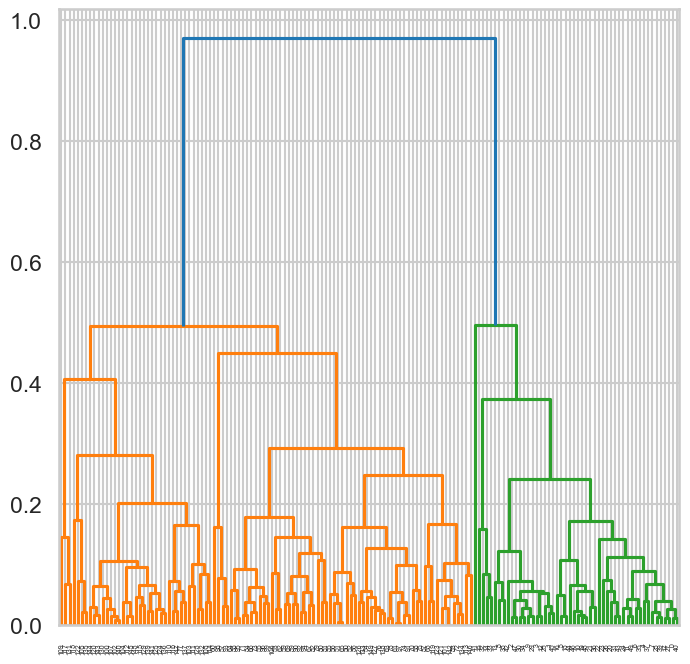

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X2final, method='average', metric='euclidean')
dendrogram(linkage_data)

plt.show()

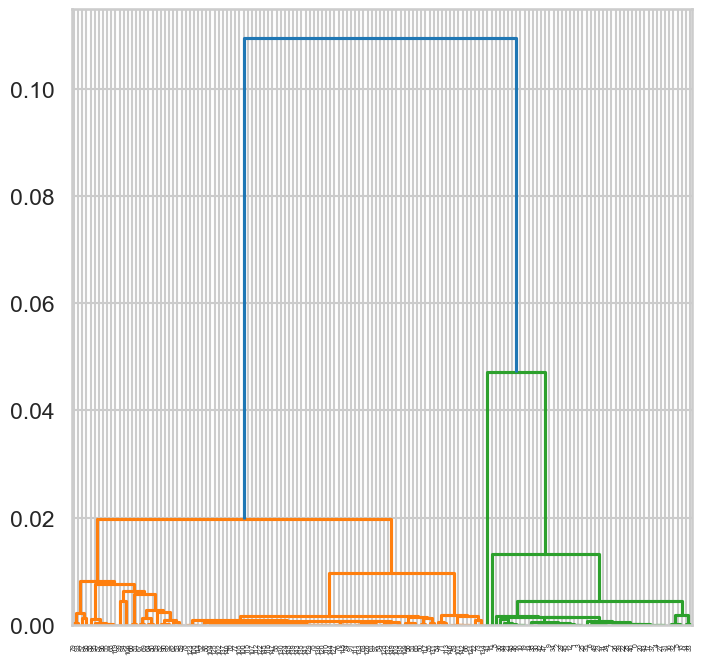

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X2final, method='single', metric='cosine')
dendrogram(linkage_data)

plt.show()

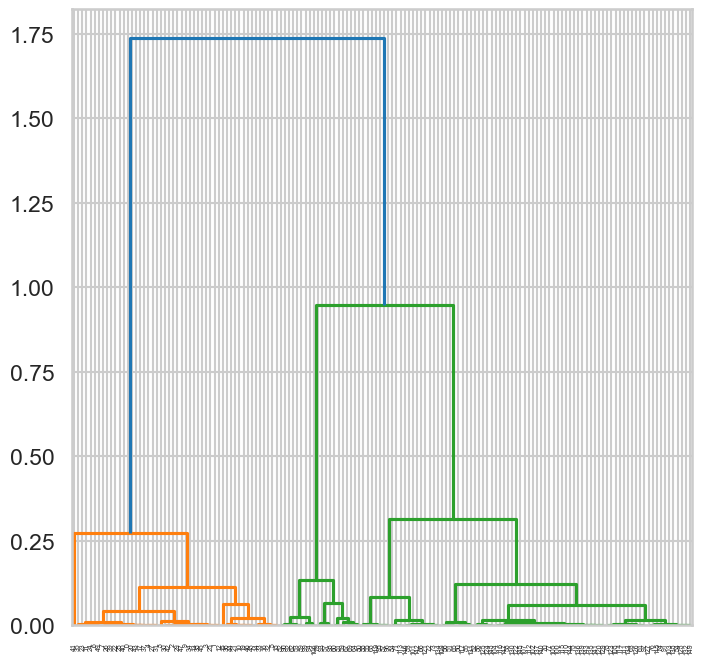

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X2final, method='average', metric='cosine')
dendrogram(linkage_data)

plt.show()

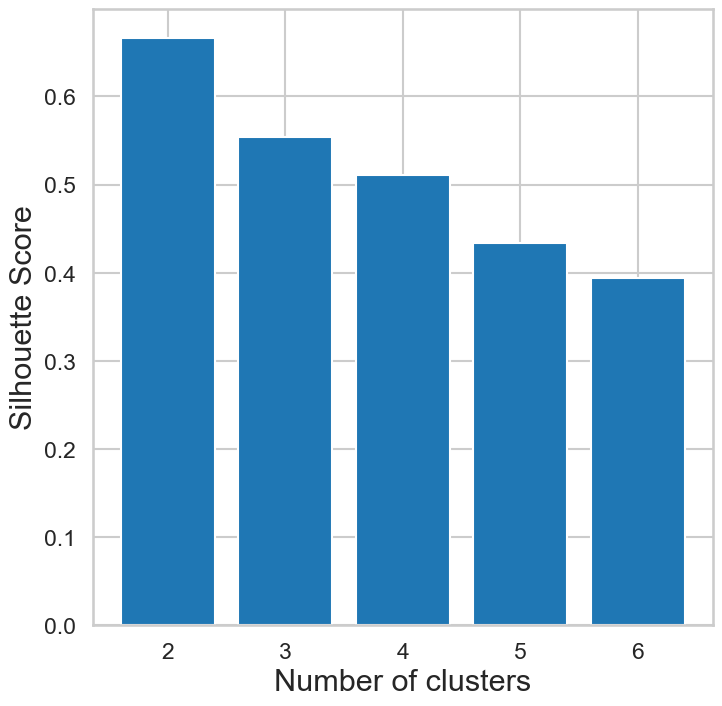

In [168]:
k = [2, 3, 4, 5, 6]

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X2final)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

ac2= AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)


# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 22)
plt.ylabel('Silhouette Score', fontsize = 22)
plt.show()

In [ ]:
##DBSCAN

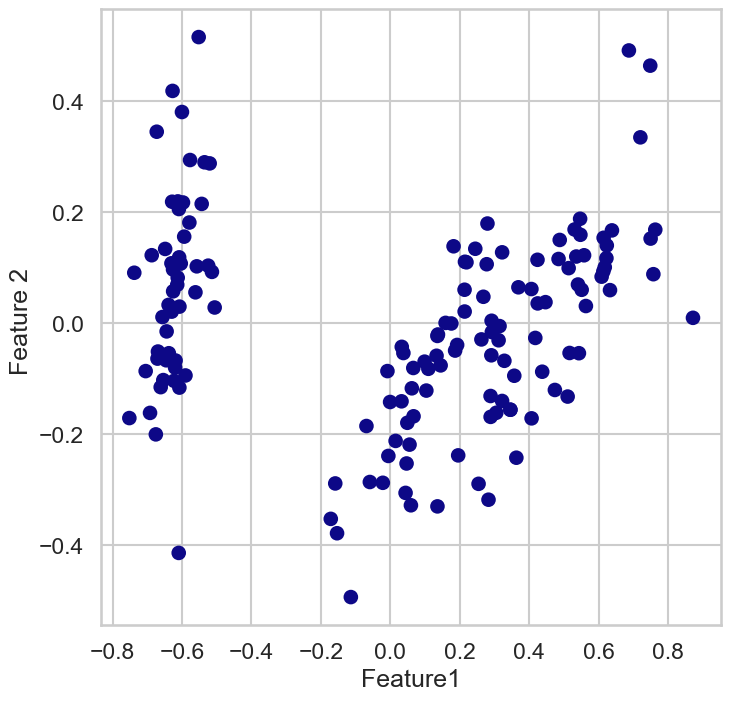

In [169]:

# cluster the data into five clusters
dbscan = DBSCAN(eps = 3, min_samples = 10).fit(irisdata) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(X2final[:, 0], X2final[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Feature1") # X-axis label
plt.ylabel("Feature 2 ") # Y-axis label
plt.show() # showing the plot

In [ ]:
##Gaussian Mixture 

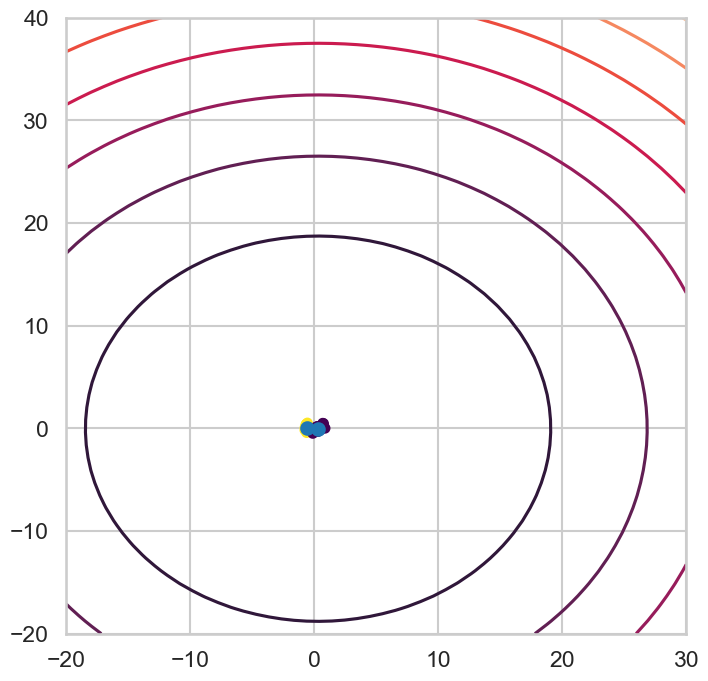

In [171]:
from sklearn.mixture import GaussianMixture as GMM

modeln=GMM(n_components=2, covariance_type='spherical')
modeln. fit (X2final) 
labelsn= modeln.predict (X2final)
plt.scatter (X2final[:, 0], X2final[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

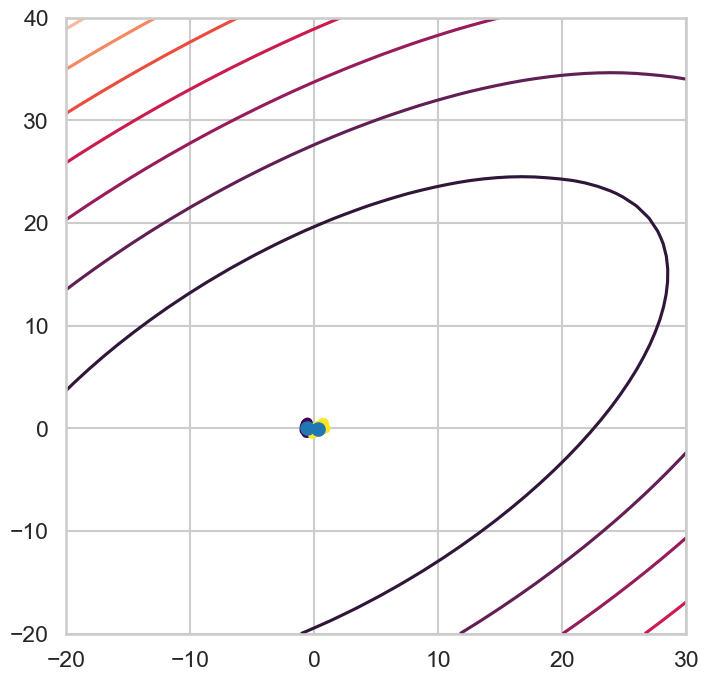

In [172]:
from sklearn.mixture import GaussianMixture as GMM

modeln=GMM(n_components=2, covariance_type='tied')
modeln. fit (X2final) 
labelsn= modeln.predict (X2final)
plt.scatter (X2final[:, 0], X2final[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

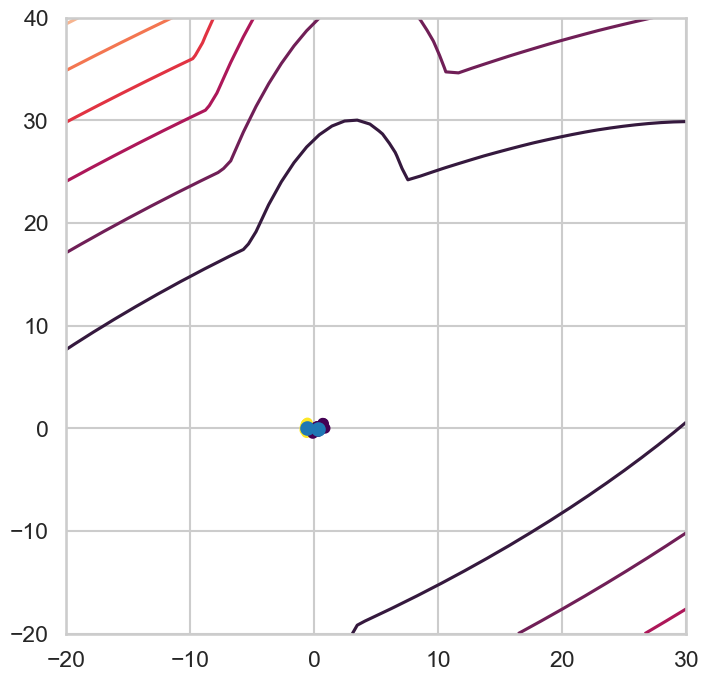

In [173]:
from sklearn.mixture import GaussianMixture as GMM

modeln=GMM(n_components=2, covariance_type='full')
modeln. fit (X2final) 
labelsn= modeln.predict (X2final)
plt.scatter (X2final[:, 0], X2final[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

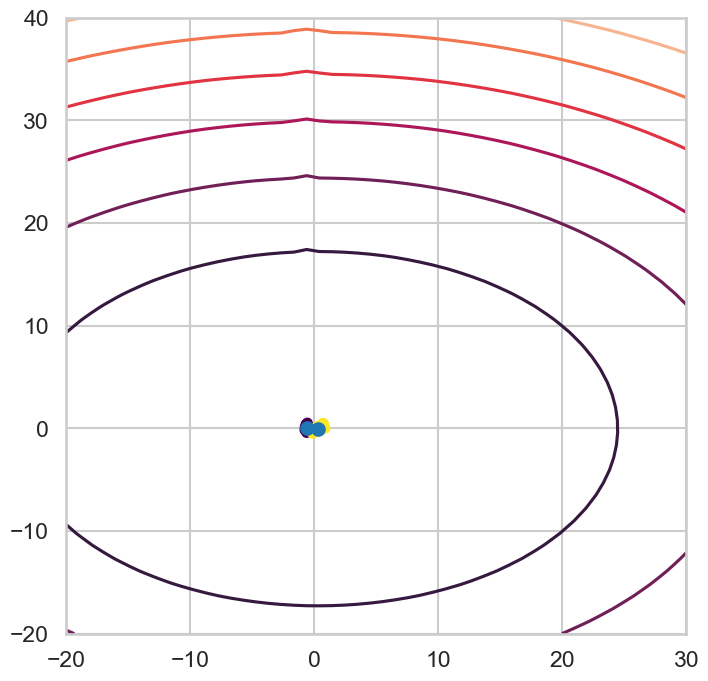

In [174]:
from sklearn.mixture import GaussianMixture as GMM

modeln=GMM(n_components=2, covariance_type='diag')
modeln. fit (X2final) 
labelsn= modeln.predict (X2final)
plt.scatter (X2final[:, 0], X2final[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

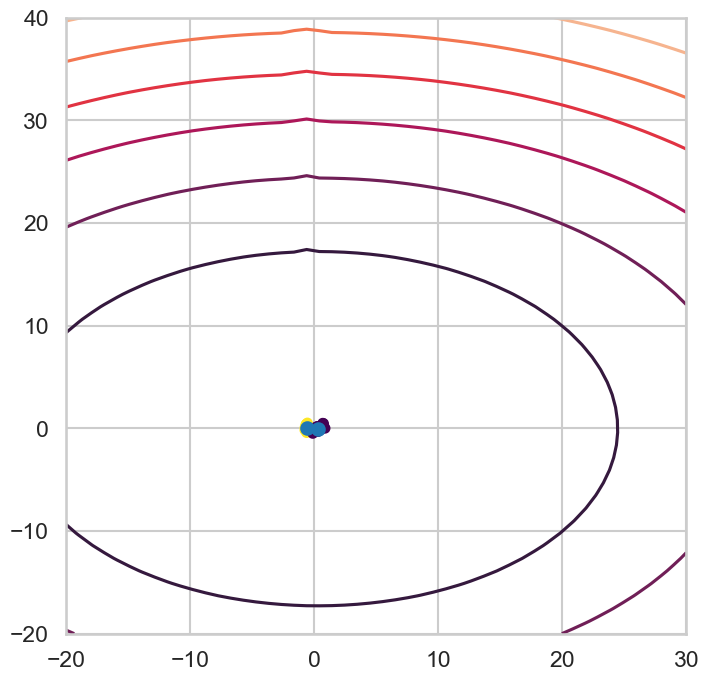

In [175]:
from sklearn.mixture import GaussianMixture as GMM

modeln=GMM(n_components=2, covariance_type='diag')
modeln. fit (X2final) 
labelsn= modeln.predict (X2final)
plt.scatter (X2final[:, 0], X2final[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

## Customer dataset
Repeat all the above on the customer data set 

In [87]:
import pandas as pd
data=pd.read_csv("Customer data.csv")
data.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
#converting the dataset to dataframe to apply normalization and PCA on it
Customer_dataframe=pd.DataFrame (data)
# Separate features from target
Xcustomer = Customer_dataframe.iloc[:,:-1]
Ycustomer = Customer_dataframe.iloc[:, -1]
# Standardize the data
scalar = StandardScaler()
Xscalar = scalar.fit_transform(Xc)
# Normalizing the scaled data using MinMaxScaler
Customernormalize = MinMaxScaler()
Xnormalized = Customernormalize.fit_transform(Xscalar)
# Instantiate PA object with desired number of components
Customerpca = PCA(n_components=2)
# Fit and transform the data
FinalData = Customerpca.fit_transform(Xnormalized)


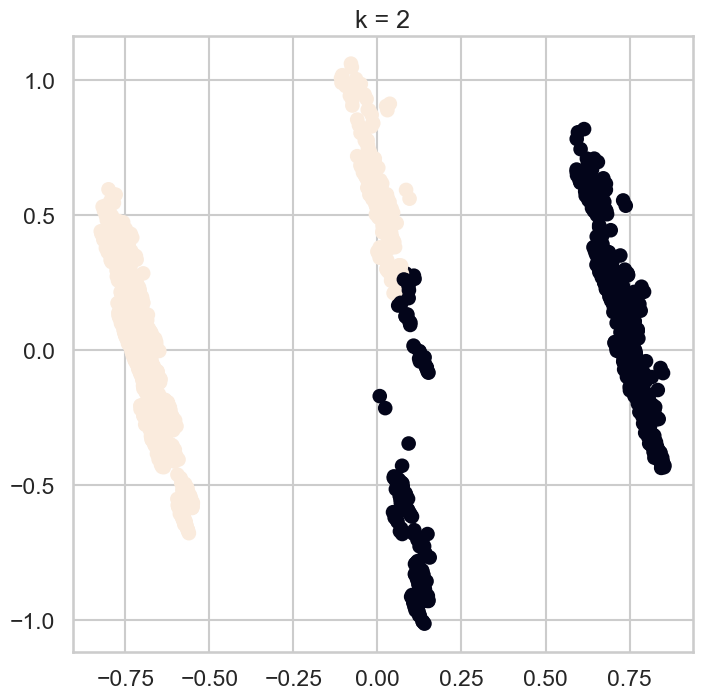

In [149]:
# Define List of values of k to try
clustering=2
# Create k-means model with k clusters
kmeans = KMeans (n_clusters=2, random_state=42)
# Fit model to data
kmeans.fit(FinalData)
# Get predicted cluster labels for data
y = kmeans.predict(FinalData)

   
# PLot results
plt.scatter(FinalData[:, 0], FinalData[:, 1], c=y)
plt.title('k = {}'.format (clustering))
plt.show()

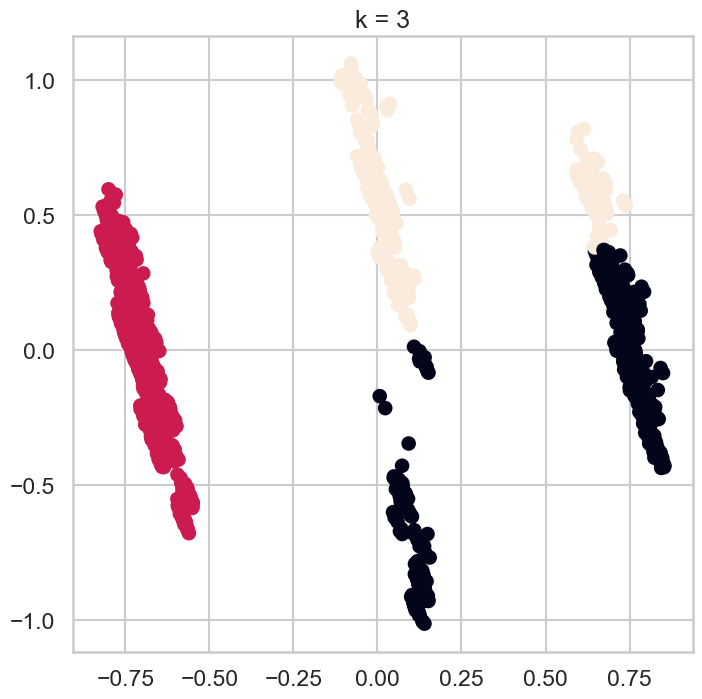

In [112]:
# Define List of values of k to try
clustering=3
# Create k-means model with k clusters
kmeans = KMeans (n_clusters=3, random_state=42)
# Fit model to data
kmeans.fit(FinalData)
# Get predicted cluster labels for data
y = kmeans.predict(FinalData)

   
# PLot results
plt.scatter(FinalData[:, 0], FinalData[:, 1], c=y)
plt.title('k = {}'.format (clustering))
plt.show()

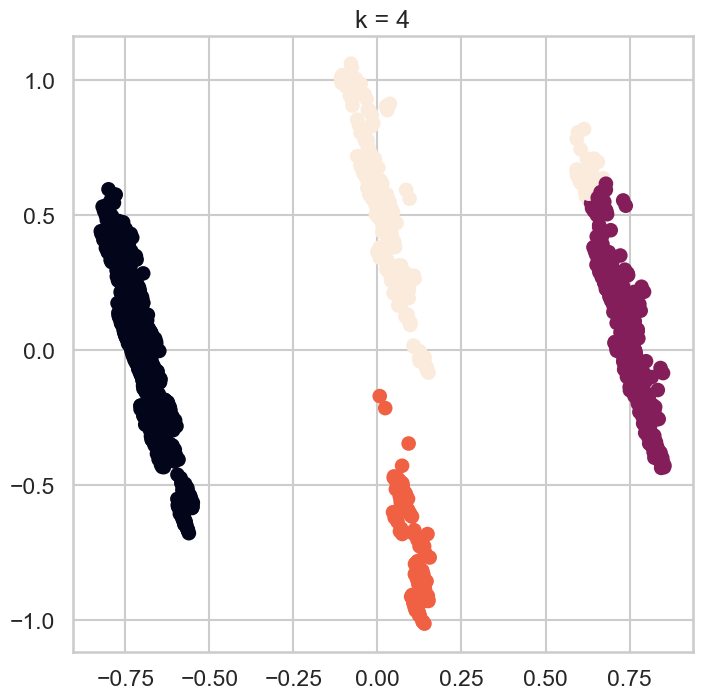

In [113]:
# Define List of values of k to try
clustering=4
# Create k-means model with k clusters
kmeans = KMeans (n_clusters=4, random_state=42)
# Fit model to data
kmeans.fit(FinalData)
# Get predicted cluster labels for data
y = kmeans.predict(FinalData)

   
# PLot results
plt.scatter(FinalData[:, 0], FinalData[:, 1], c=y)
plt.title('k = {}'.format (clustering))
plt.show()

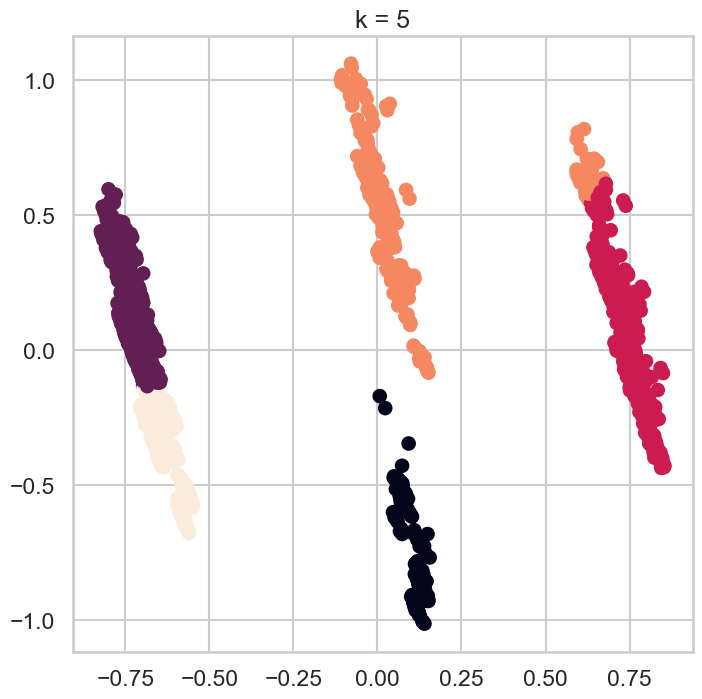

In [114]:
# Define List of values of k to try
clustering=5
# Create k-means model with k clusters
kmeans = KMeans (n_clusters=5, random_state=42)
# Fit model to data
kmeans.fit(FinalData)
# Get predicted cluster labels for data
y = kmeans.predict(FinalData)

   
# PLot results
plt.scatter(FinalData[:, 0], FinalData[:, 1], c=y)
plt.title('k = {}'.format (clustering))
plt.show()

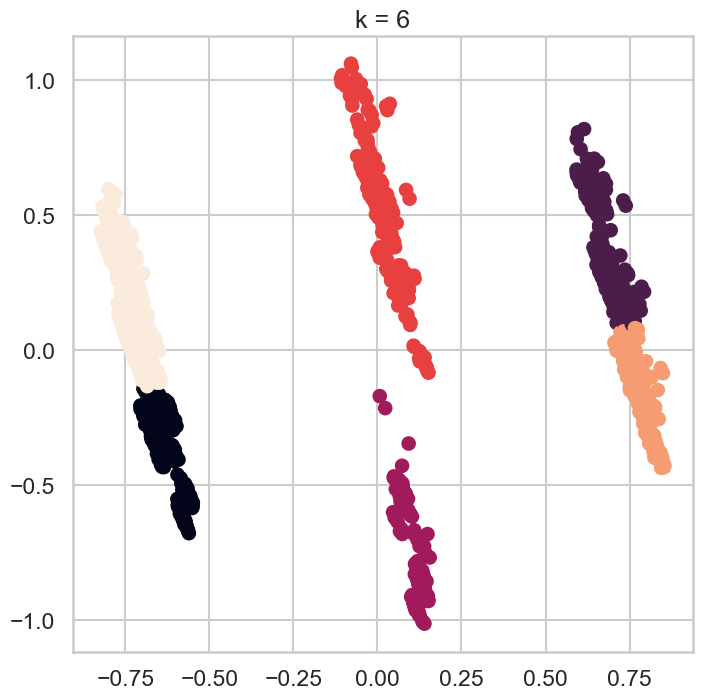

In [115]:
# Define List of values of k to try
clustering=6
# Create k-means model with k clusters
kmeans = KMeans (n_clusters=6, random_state=42)
# Fit model to data
kmeans.fit(FinalData)
# Get predicted cluster labels for data
y = kmeans.predict(FinalData)

   
# PLot results
plt.scatter(FinalData[:, 0], FinalData[:, 1], c=y)
plt.title('k = {}'.format (clustering))
plt.show()

In [ ]:
### Hierarchal Clustering For Customer Dataset

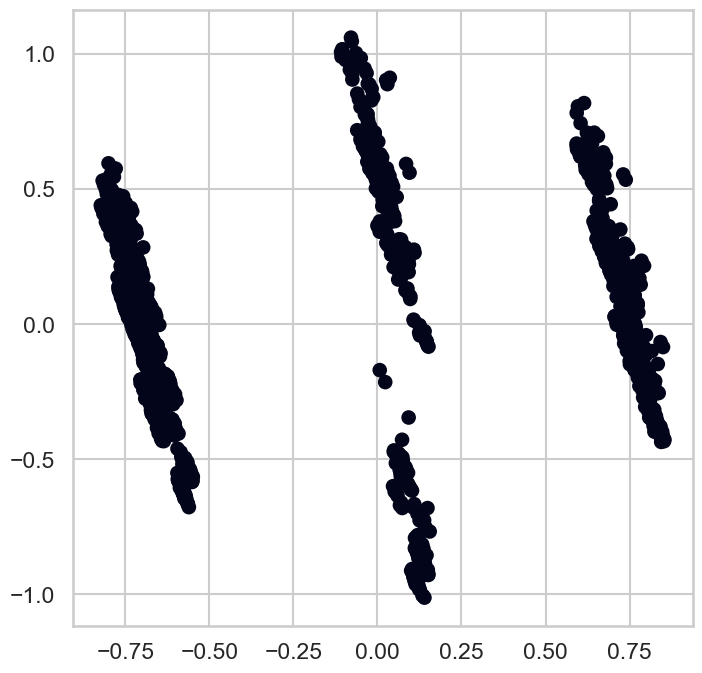

In [117]:
from sklearn.decomposition import PCA
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
FinalData2 = PCA(n_components=2).fit_transform(FinalData)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='euclidean', linkage='average')
model.fit(FinalData2)
labels = model.labels_
plt.scatter(FinalData2[:, 0], FinalData2[:, 1], c=labels)
plt.show()

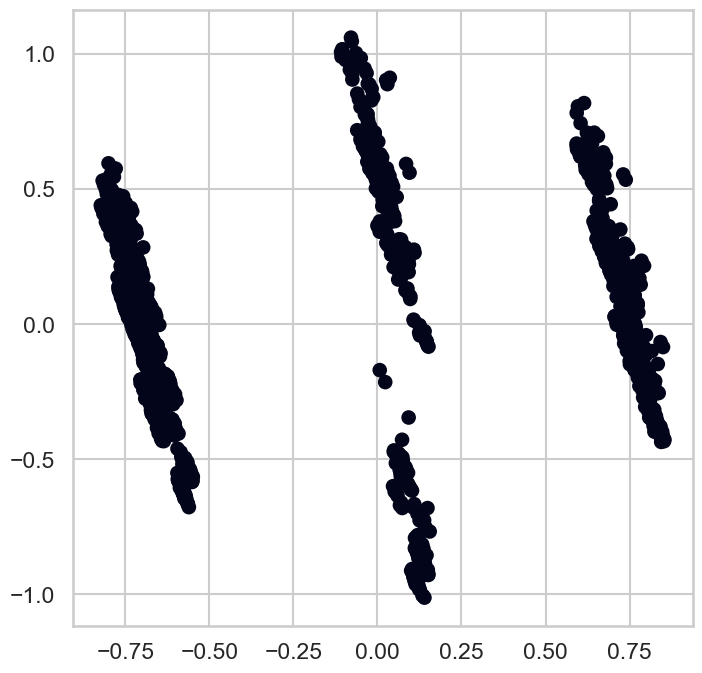

In [118]:
from sklearn.decomposition import PCA
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
FinalData2 = PCA(n_components=2).fit_transform(FinalData)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='euclidean', linkage='single')
model.fit(FinalData2)
labels = model.labels_
plt.scatter(FinalData2[:, 0], FinalData2[:, 1], c=labels)
plt.show()

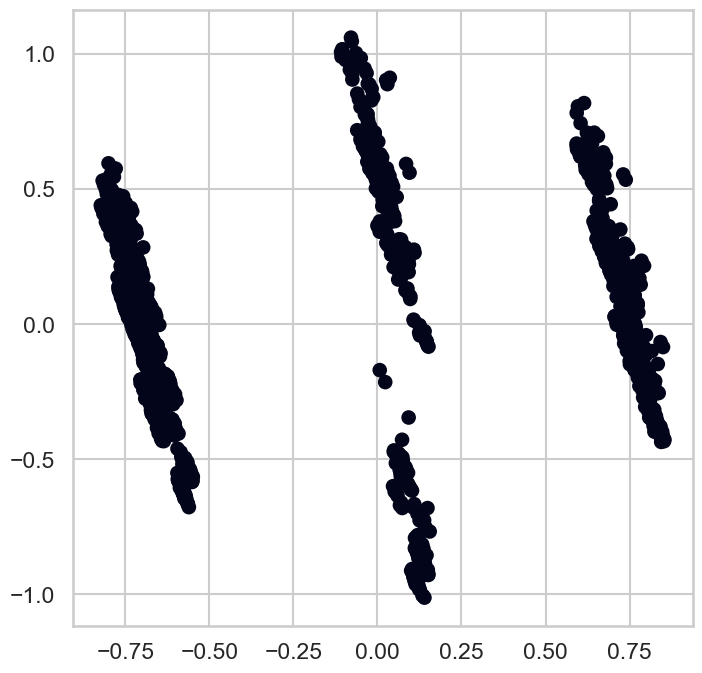

In [119]:
from sklearn.decomposition import PCA
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
FinalData2 = PCA(n_components=2).fit_transform(FinalData)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='manhattan', linkage='average')
model.fit(FinalData2)
labels = model.labels_
plt.scatter(FinalData2[:, 0], FinalData2[:, 1], c=labels)
plt.show()

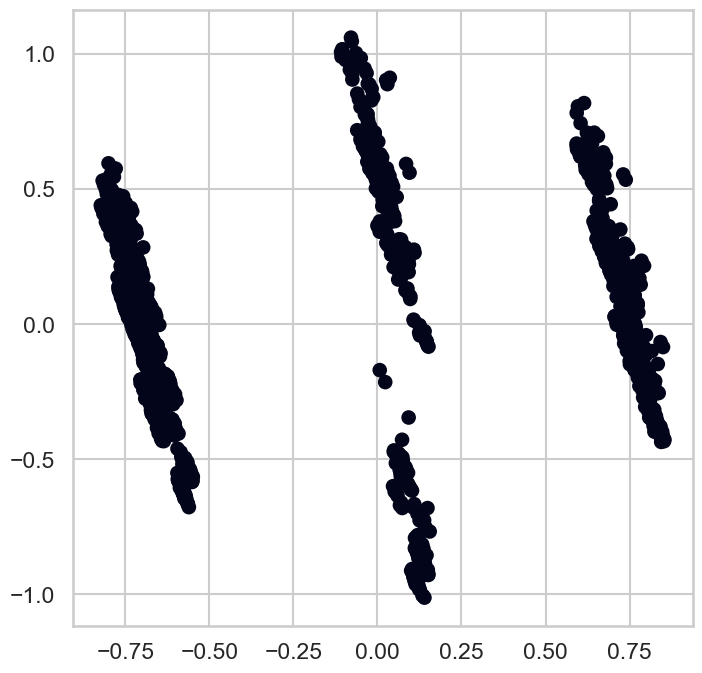

In [120]:
from sklearn.decomposition import PCA
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
FinalData2 = PCA(n_components=2).fit_transform(FinalData)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='manhattan', linkage='single')
model.fit(FinalData2)
labels = model.labels_
plt.scatter(FinalData2[:, 0], FinalData2[:, 1], c=labels)
plt.show()

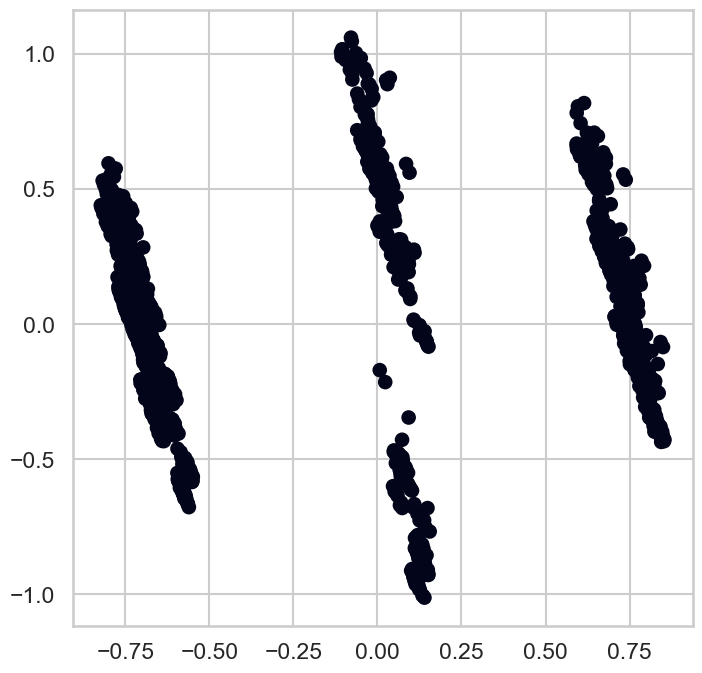

In [121]:
from sklearn.decomposition import PCA
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
FinalData2 = PCA(n_components=2).fit_transform(FinalData)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='cosine', linkage='average')
model.fit(FinalData2)
labels = model.labels_
plt.scatter(FinalData2[:, 0], FinalData2[:, 1], c=labels)
plt.show()

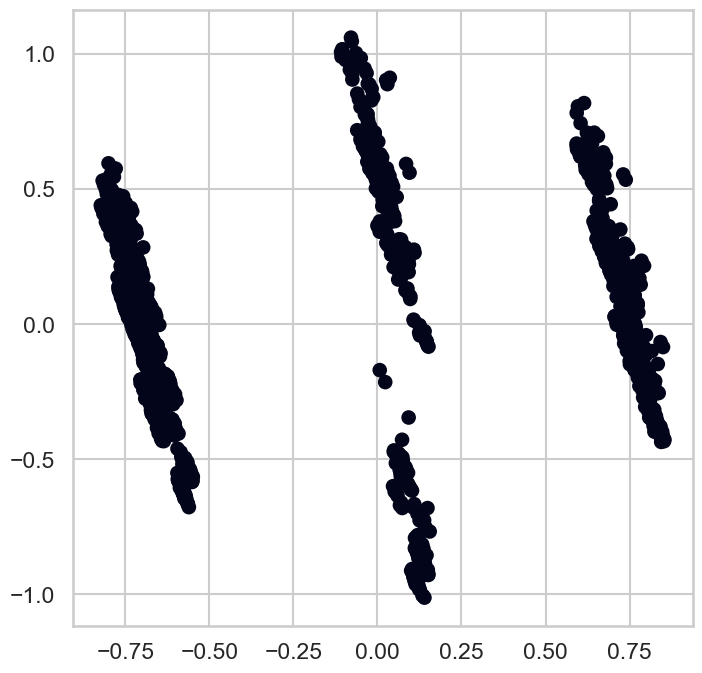

In [122]:
from sklearn.decomposition import PCA
#Using ward linkage 
#Using PCA to be able to use 4 parameters or components instead of 3
FinalData2 = PCA(n_components=2).fit_transform(FinalData)
model = AgglomerativeClustering(n_clusters=None,distance_threshold=400.0,affinity='cosine', linkage='single')
model.fit(FinalData2)
labels = model.labels_
plt.scatter(FinalData2[:, 0], FinalData2[:, 1], c=labels)
plt.show()

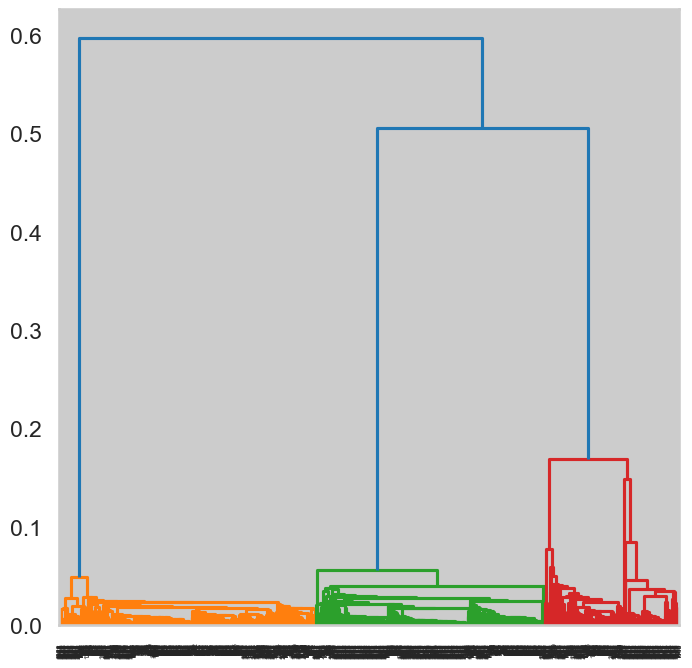

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


linkage_data = linkage(FinalData, method='single', metric='euclidean')
dendrogram(linkage_data)

plt.show()

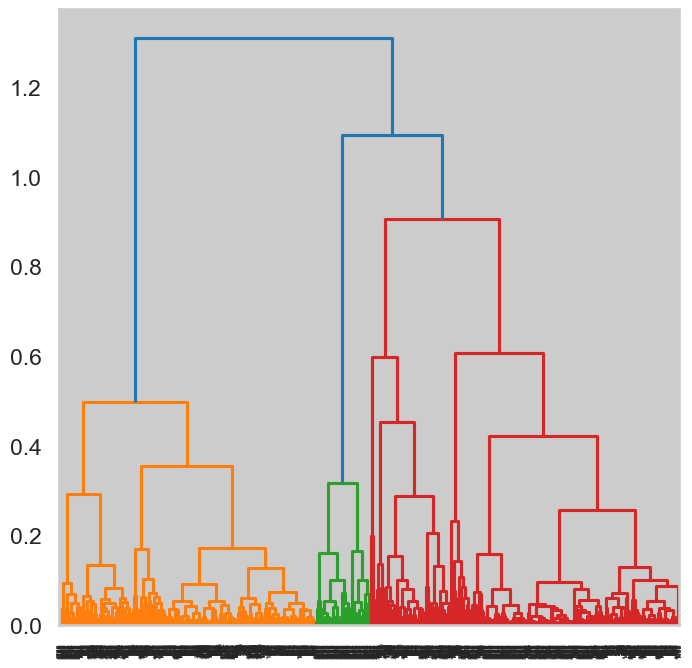

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


linkage_data = linkage(FinalData, method='average', metric='euclidean')
dendrogram(linkage_data)

plt.show()

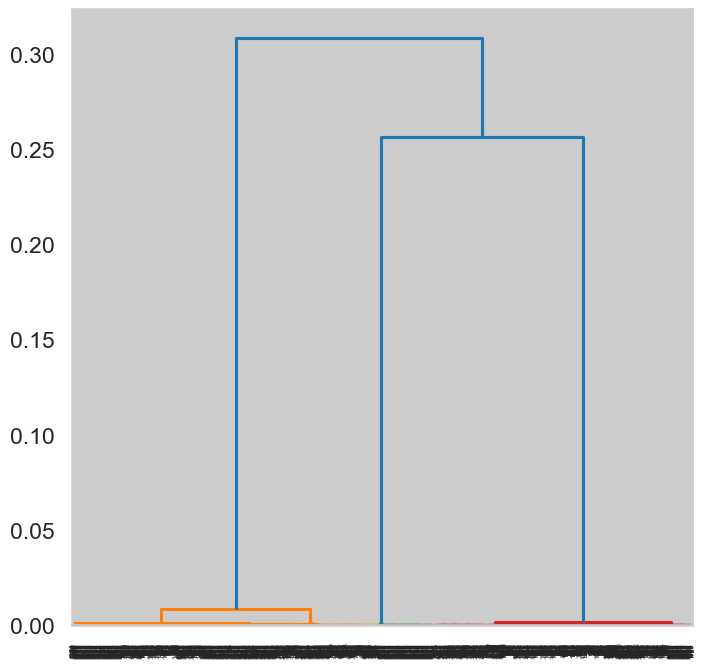

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


linkage_data = linkage(FinalData, method='single', metric='cosine')
dendrogram(linkage_data)

plt.show()

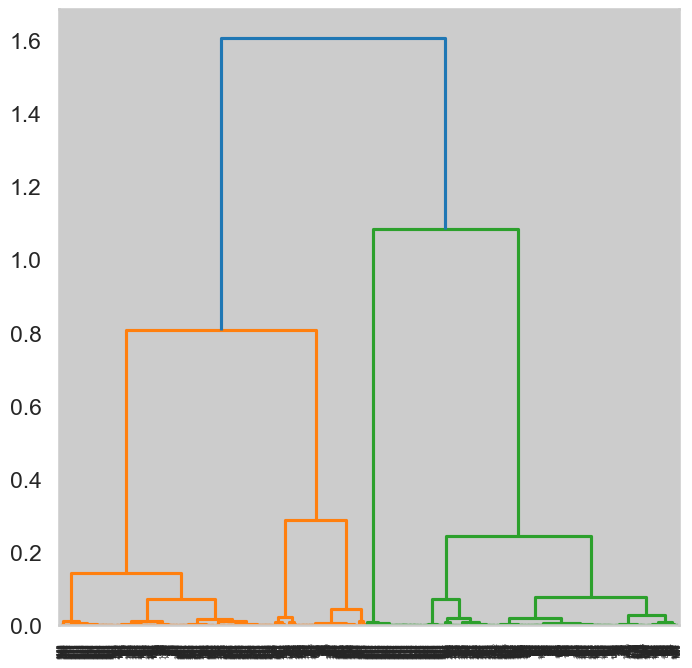

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


linkage_data = linkage(FinalData, method='average', metric='cosine')
dendrogram(linkage_data)

plt.show()

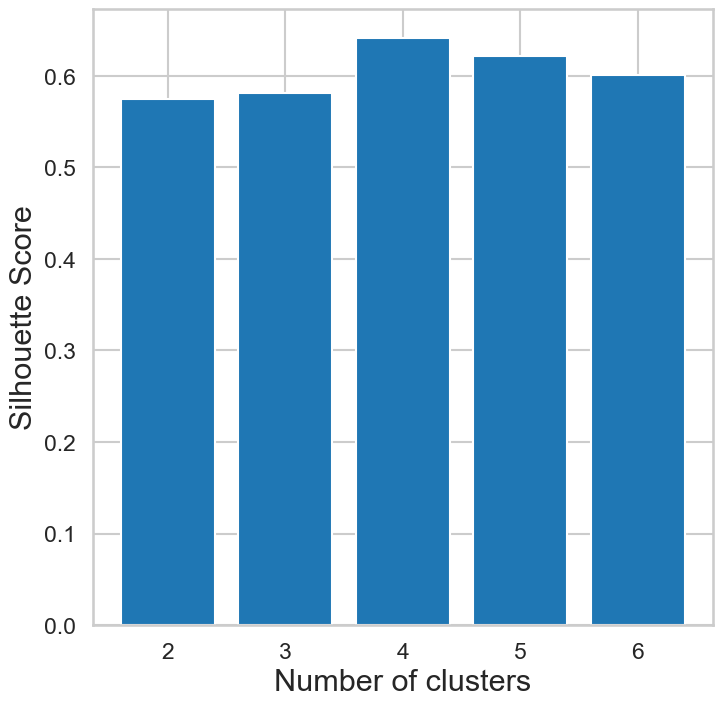

In [127]:
k = [2, 3, 4, 5, 6]

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(FinalData)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

ac2= AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)


# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 22)
plt.ylabel('Silhouette Score', fontsize = 22)
plt.show()

In [ ]:
#####DBSCAN 

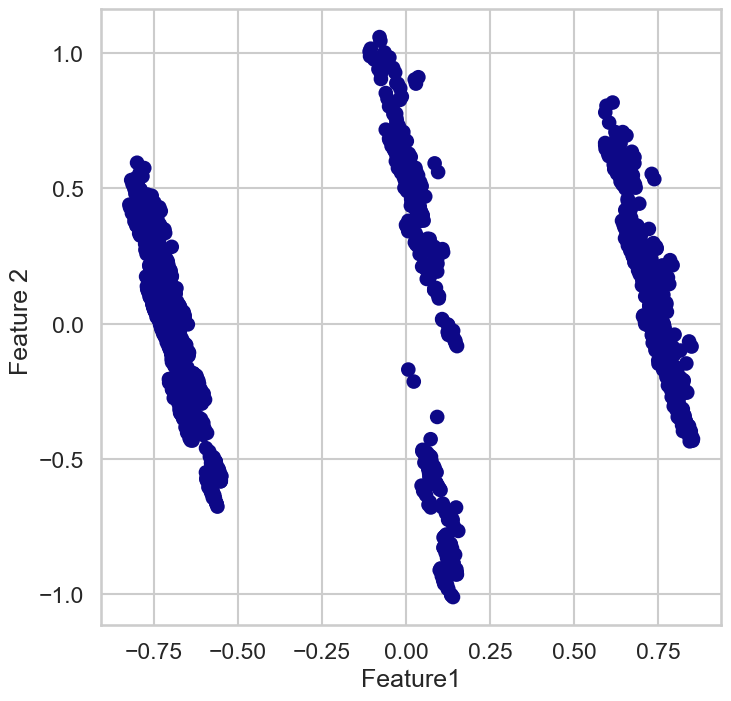

In [143]:

# cluster the data into five clusters
dbscan = DBSCAN(eps = 3, min_samples = 10).fit(FinalData) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(FinalData[:, 0], FinalData[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Feature1") # X-axis label
plt.ylabel("Feature 2 ") # Y-axis label
plt.show() # showing the plot

In [ ]:
###Gaussian Mixture

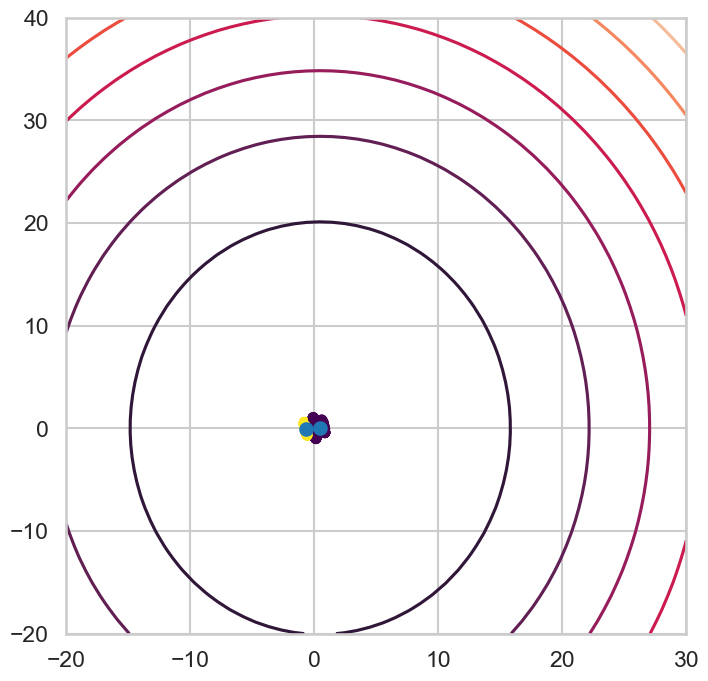

In [144]:
from sklearn.mixture import GaussianMixture as GMM

modeln=GMM(n_components=2, covariance_type='diag')
modeln. fit (FinalData) 
labelsn= modeln.predict (FinalData)
plt.scatter (FinalData[:, 0], FinalData[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

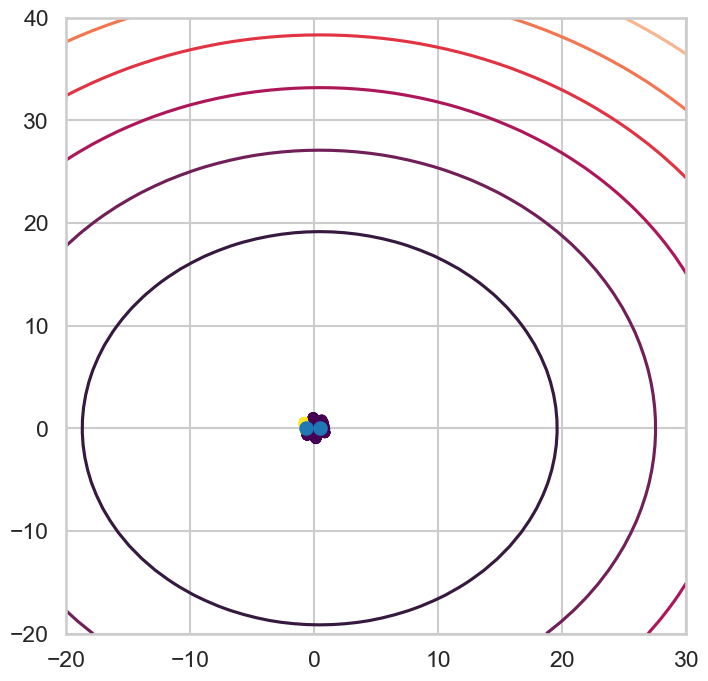

In [145]:
from sklearn.mixture import GaussianMixture as GMM

modeln=GMM(n_components=2, covariance_type='spherical')
modeln. fit (FinalData) 
labelsn= modeln.predict (FinalData)
plt.scatter (FinalData[:, 0], FinalData[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

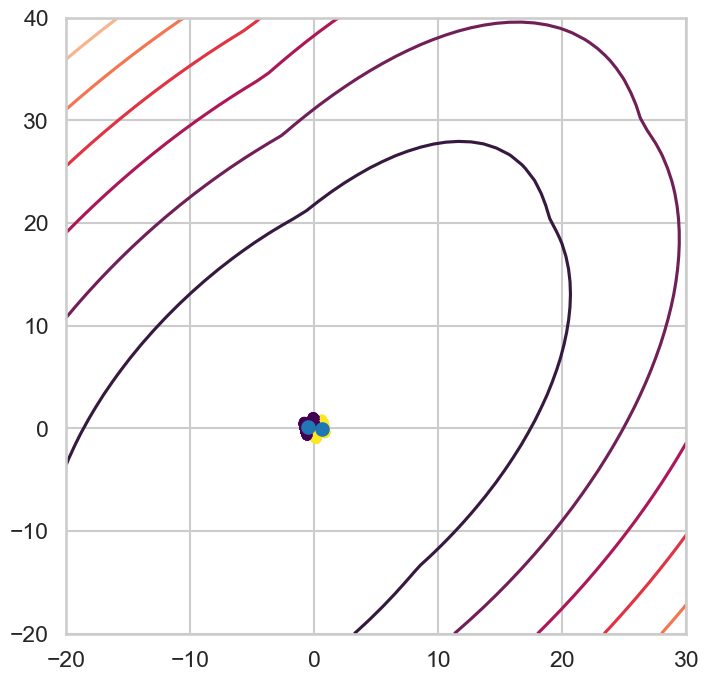

In [146]:
from sklearn.mixture import GaussianMixture as GMM

modeln=GMM(n_components=2, covariance_type='full')
modeln. fit (FinalData) 
labelsn= modeln.predict (FinalData)
plt.scatter (FinalData[:, 0], FinalData[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])

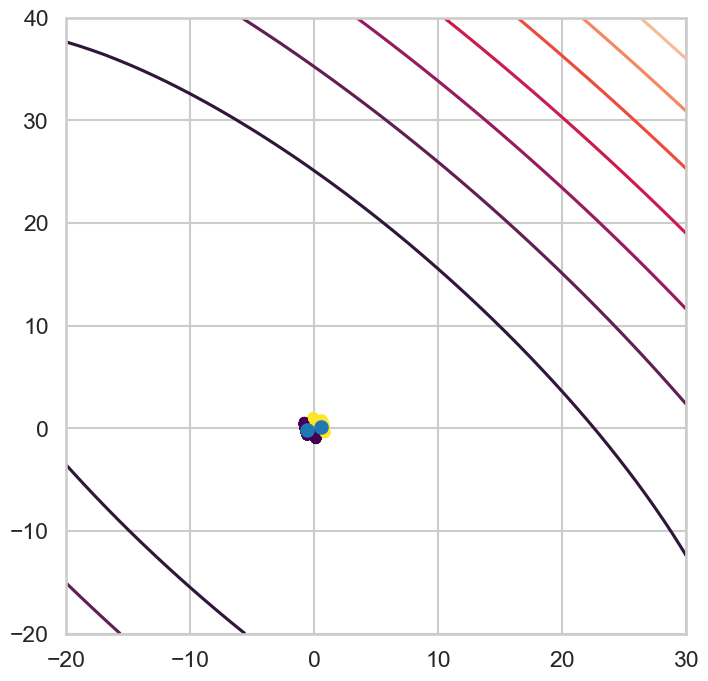

In [147]:
from sklearn.mixture import GaussianMixture as GMM

modeln=GMM(n_components=2, covariance_type='tied')
modeln. fit (FinalData) 
labelsn= modeln.predict (FinalData)
plt.scatter (FinalData[:, 0], FinalData[:, 1], c=labelsn, s=40, cmap='viridis');
x = np.linspace(-20.0, 30.0) 
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = - modeln.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z)
cn=np.transpose(modeln.means_)
plt.scatter(cn[0],cn[1])